<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/ML/1.Data_Preprocessing.%20Data%20Prepocessing%20(%D0%9F%D0%BE%D0%B4%D0%B3%D0%BE%D1%82%D0%BE%D0%B2%D0%BA%D0%B0%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Data_Preprocessing. Data Prepocessing (Подготовка данных)

## Статические непрерывные переменные (Static Continuous Variables)

### Дискретизация (Discretization)


Дискретизация — это процесс преобразования непрерывных переменных в дискретные (категориальные) путем разделения их диапазона значений на интервалы (бины). Этот подход может сделать модель более устойчивой, уменьшить влияние шума и упростить интерпретацию данных. Например, при анализе покупательского поведения клиента, совершившего 30 покупок, его поведение может быть практически идентичным поведению клиента, совершившего 32 покупки. В таких случаях излишняя точность может не нести полезной информации, а лишь добавлять шум. Именно поэтому в алгоритмах, таких как LightGBM, используется метод гистограмм для автоматической дискретизации данных, что помогает избежать переобучения.

#### Зачем нужна дискретизация?
1. **Упрощение модели**: Дискретизация уменьшает сложность данных, что может улучшить производительность модели.
2. **Устойчивость к шуму**: Небольшие колебания в данных (например, 30 vs 32 покупки) не влияют на результат.
3. **Интерпретируемость**: Дискретные интервалы легче анализировать и объяснять.
4. **Эффективность**: Работа с категориальными данными может быть быстрее, чем с непрерывными.

#### Способы дискретизации

1. **Равномерная дискретизация (Equal Width Binning)**  
   Диапазон значений переменной делится на равные интервалы.  
   **Пример**:  
   Пусть у нас есть переменная "Возраст" с диапазоном от 18 до 60 лет. Мы решаем разделить её на 4 интервала:  
   - 18–30  
   - 31–43  
   - 44–56  
   - 57–60  

   Преимущество: простота реализации.  
   Недостаток: может быть неравномерное распределение данных по интервалам.

2. **Дискретизация по квантилям (Equal Frequency Binning)**  
   Диапазон значений делится так, чтобы в каждом интервале было примерно одинаковое количество наблюдений.  
   **Пример**:  
   Для переменной "Доход" с 100 наблюдениями мы создаем 5 интервалов, каждый из которых будет содержать 20 наблюдений.  
   - Интервал 1: 20 наименьших доходов  
   - Интервал 2: следующие 20 доходов  
   - ...  
   - Интервал 5: 20 наибольших доходов  

   Преимущество: равномерное распределение данных.  
   Недостаток: интервалы могут быть разной ширины.

3. **Дискретизация на основе статистик (K-means Binning)**  
   Используются методы кластеризации (например, K-means) для разделения данных на интервалы.  
   **Пример**:  
   Для переменной "Количество покупок" алгоритм K-means может разделить данные на 3 кластера:  
   - Низкая активность (1–10 покупок)  
   - Средняя активность (11–20 покупок)  
   - Высокая активность (21+ покупок)  

   Преимущество: адаптивность к структуре данных.  
   Недостаток: требует вычислительных ресурсов.

4. **Дискретизация на основе экспертных знаний**  
   Интервалы задаются вручную на основе предметной области.  
   **Пример**:  
   Для переменной "Температура" можно задать интервалы:  
   - Холодно: < 0°C  
   - Умеренно: 0–20°C  
   - Тепло: 21–30°C  
   - Жарко: > 30°C  

   Преимущество: учитывает специфику данных.  
   Недостаток: требует глубокого понимания предметной области.

#### Пример применения в Python


In [ ]:
import pandas as pd

# Пример данных
data = pd.DataFrame({'Возраст': [18, 22, 25, 30, 35, 40, 45, 50, 55, 60]})

# Равномерная дискретизация
data['Возраст_равномерно'] = pd.cut(data['Возраст'], bins=4, labels=['18-30', '31-43', '44-56', '57-60'])

# Дискретизация по квантилям
data['Возраст_квантили'] = pd.qcut(data['Возраст'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

print(data)

   Возраст Возраст_равномерно Возраст_квантили
0       18              18-30               Q1
1       22              18-30               Q1
2       25              18-30               Q1
3       30              31-43               Q2
4       35              31-43               Q2
5       40              44-56               Q3
6       45              44-56               Q3
7       50              57-60               Q4
8       55              57-60               Q4
9       60              57-60               Q4



Таким образом, дискретизация — это мощный инструмент для упрощения и улучшения качества данных. Выбор метода зависит от характера данных и задачи. Например, равномерная дискретизация подходит для простых случаев, а дискретизация на основе статистик — для более сложных сценариев.

#### Бинаризация (Binarization)



Бинаризация — это процесс преобразования числовых признаков в бинарные (двоичные) значения, обычно 0 и 1. Этот метод используется, когда важно разделить данные на две категории на основе определенного порогового значения. Бинаризация упрощает данные, делая их более интерпретируемыми, и может быть полезной в задачах классификации, где требуется четкое разделение на два класса.

#### Зачем нужна бинаризация?
1. **Упрощение данных**: Преобразование сложных числовых данных в простые бинарные значения.
2. **Интерпретируемость**: Бинарные данные легче анализировать и понимать.
3. **Эффективность**: Некоторые алгоритмы машинного обучения работают быстрее с бинарными данными.
4. **Акцентирование на важных значениях**: Позволяет выделить значимые пороговые значения (например, "выше/ниже среднего").

#### Как работает бинаризация?
Бинаризация выполняется путем сравнения значений числового признака с заданным порогом. Если значение превышает порог, оно преобразуется в 1, иначе — в 0.

**Формула**:  
$$
\text{Бинарное значение} =
\begin{cases}
1, & \text{если значение} > \text{порог} \\
0, & \text{иначе}
\end{cases}
$$

#### Примеры бинаризации

1. **Пример 1: Возраст**  
   Пусть у нас есть признак "Возраст", и мы хотим разделить людей на две категории: "Молодой" (0) и "Взрослый" (1). Пороговое значение — 30 лет.  
   - Возраст = 25 → 0 (Молодой)  
   - Возраст = 35 → 1 (Взрослый)  

2. **Пример 2: Доход**  
   Признак "Доход" можно бинаризовать, чтобы разделить людей на две группы: "Низкий доход" (0) и "Высокий доход" (1). Пороговое значение — 50 000 рублей.  
   - Доход = 45 000 → 0 (Низкий доход)  
   - Доход = 55 000 → 1 (Высокий доход)  

3. **Пример 3: Количество покупок**  
   Признак "Количество покупок" можно преобразовать в бинарный, чтобы выделить активных клиентов. Пороговое значение — 10 покупок.  
   - Покупки = 8 → 0 (Неактивный)  
   - Покупки = 12 → 1 (Активный)  

#### Методы выбора порога
1. **На основе экспертных знаний**: Порог выбирается вручную, исходя из предметной области.  
   Например, в медицине порог для "Высокого давления" может быть 140 мм рт. ст.  

2. **На основе статистик**: Порог может быть средним значением, медианой или другим статистическим показателем.  
   Например, использовать средний доход как порог для бинаризации.  

3. **На основе алгоритмов**: Некоторые методы машинного обучения автоматически выбирают оптимальный порог.  

#### Пример применения в Python



In [ ]:
import pandas as pd
from sklearn.preprocessing import Binarizer

# Пример данных
data = pd.DataFrame({'Возраст': [18, 22, 25, 30, 35, 40, 45, 50, 55, 60]})

# Бинаризация с порогом 30
binarizer = Binarizer(threshold=30)
data['Возраст_бинарный'] = binarizer.fit_transform(data[['Возраст']])

print(data)

   Возраст  Возраст_бинарный
0       18                 0
1       22                 0
2       25                 0
3       30                 0
4       35                 1
5       40                 1
6       45                 1
7       50                 1
8       55                 1
9       60                 1



### Приведем еще пример с использованием набора данных **California Housing**

В этом примере мы будем использовать набор данных **California Housing**, который содержит информацию о недвижимости в Калифорнии. Мы возьмем первый признак (средний доход домохозяйства) и применим бинаризацию с порогом 3 (условное значение для разделения на "низкий" и "высокий" доход).


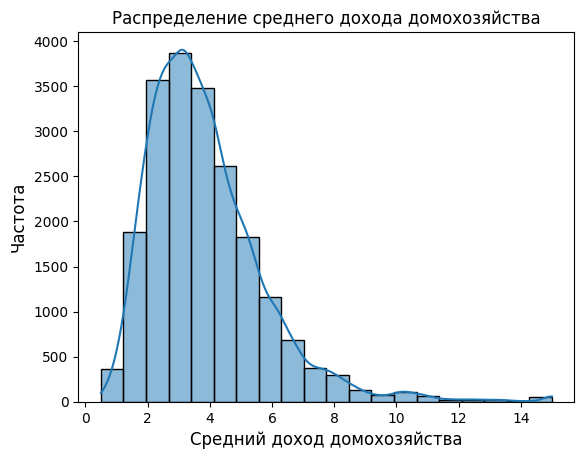

Исходные значения: [8.3252 8.3014 7.2574 5.6431 3.8462 4.0368 3.6591 3.12   2.0804 3.6912]
Бинаризованные значения: [1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]


In [ ]:
# Загрузка данных
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Загрузка набора данных California Housing
dataset = fetch_california_housing()
X, y = dataset.data, dataset.target  # X — признаки, y — целевая переменная

# Визуализация распределения первого признака (средний доход домохозяйства)
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
sns.histplot(X[:, 0], kde=True, bins=20)
ax.set_title('Распределение среднего дохода домохозяйства', fontsize=12)
ax.set_xlabel('Средний доход домохозяйства', fontsize=12)
ax.set_ylabel('Частота', fontsize=12)
plt.show()  # Видим, что распределение имеет длинный хвост

# Бинаризация первого признака
from sklearn.preprocessing import Binarizer

# Выбор первых 10 значений первого признака
sample_columns = X[0:10, 0]
print("Исходные значения:", sample_columns)
# Пример вывода: array([8.3252, 8.3014, 7.2574, 5.6431, 3.8462, 4.0368, 3.6591, 3.12, 2.0804, 3.6912])

# Установка порога для бинаризации (3)
model = Binarizer(threshold=3)

# Применение бинаризации
result = model.fit_transform(sample_columns.reshape(-1, 1)).reshape(-1)
print("Бинаризованные значения:", result)
# Пример вывода: array([1., 1., 1., 1., 1., 1., 1., 1., 0., 1.])

#### Биннинг (Binning)



Биннинг — это процесс преобразования непрерывных числовых признаков в дискретные интервалы (бины). Этот метод полезен для упрощения данных, уменьшения шума и улучшения интерпретируемости. Биннинг может быть выполнен различными способами, включая равномерное разделение (Uniform Binning) и разделение по квантилям (Quantile Binning).

#### Зачем нужен биннинг?
1. **Упрощение данных**: Преобразование непрерывных данных в дискретные интервалы.
2. **Устойчивость к шуму**: Небольшие колебания в данных не влияют на результат.
3. **Интерпретируемость**: Дискретные интервалы легче анализировать и объяснять.
4. **Эффективность**: Некоторые алгоритмы машинного обучения работают быстрее с дискретными данными.

#### Равномерный биннинг (Uniform Binning)

Равномерный биннинг делит диапазон значений признака на равные интервалы. Этот метод прост в реализации, но может привести к неравномерному распределению данных по интервалам.

**Пример**:  
Пусть у нас есть признак "Возраст" с диапазоном от 18 до 60 лет. Мы решаем разделить его на 4 интервала:  
- 18–30  
- 31–43  
- 44–56  
- 57–60  

**Пример в Python**:

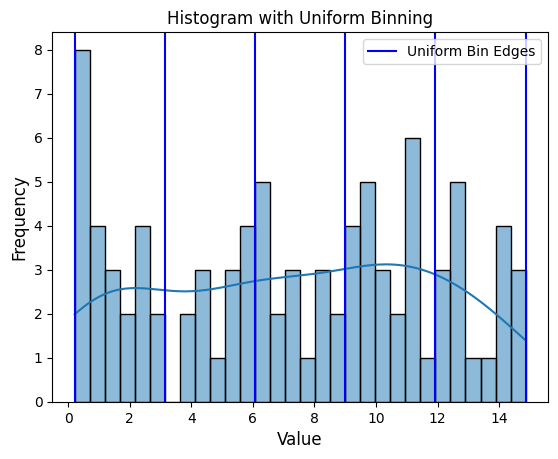

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Пример данных
X = np.random.uniform(0, 15, 100).reshape(-1, 1)

# Разделение на обучающую и тестовую выборки
test_set = X[0:10, 0]
train_set = X[10:, 0]

# Создание модели равномерного биннинга
model = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
model.fit(train_set.reshape(-1, 1))

# Преобразование данных
transformed_train = model.transform(train_set.reshape(-1, 1)).reshape(-1)
transformed_test = model.transform(test_set.reshape(-1, 1)).reshape(-1)

# Границы интервалов
bin_edges = model.bin_edges_[0]

# Визуализация
fig, ax = plt.subplots()
sns.histplot(train_set, kde=True, bins=30)

for edge in bin_edges:
    line = plt.axvline(edge, color='b')
ax.legend([line], ['Uniform Bin Edges'], fontsize=10)
ax.set_title('Histogram with Uniform Binning', fontsize=12)
ax.set_xlabel('Value', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.show()

#####Биннинг по квантилям (Quantile Binning)

Биннинг по квантилям делит диапазон значений так, чтобы в каждом интервале было примерно одинаковое количество наблюдений. Этот метод полезен для данных с неравномерным распределением.

**Пример**:  
Для переменной "Доход" с 100 наблюдениями мы создаем 5 интервалов, каждый из которых будет содержать 20 наблюдений.  
- Интервал 1: 20 наименьших доходов  
- Интервал 2: следующие 20 доходов  
- ...  
- Интервал 5: 20 наибольших доходов  

**Преимущества**:  
- Равномерное распределение данных по интервалам.  
- Подходит для данных с неравномерным распределением.  

**Недостатки**:  
- Интервалы могут быть разной ширины.  


**Пример в Python**:


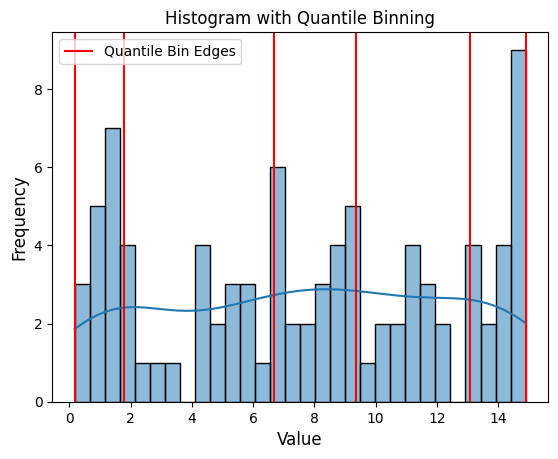

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Пример данных
X = np.random.uniform(0, 15, 100).reshape(-1, 1)

# Разделение на обучающую и тестовую выборки
test_set = X[0:10, 0]
train_set = X[10:, 0]

# Создание модели биннинга по квантилям
model = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
model.fit(train_set.reshape(-1, 1))

# Преобразование данных
transformed_train = model.transform(train_set.reshape(-1, 1)).reshape(-1)
transformed_test = model.transform(test_set.reshape(-1, 1)).reshape(-1)

# Границы интервалов
bin_edges = model.bin_edges_[0]

# Визуализация
fig, ax = plt.subplots()
sns.histplot(train_set, kde=True, bins=30)

for edge in bin_edges:
    line = plt.axvline(edge, color='r')
ax.legend([line], ['Quantile Bin Edges'], fontsize=10)
ax.set_title('Histogram with Quantile Binning', fontsize=12)
ax.set_xlabel('Value', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.show()


### Другой пример: Биннинг по k-средним (K-Means Binning)

Биннинг по k-средним использует алгоритм кластеризации k-средних для разделения данных на интервалы. Этот метод полезен, когда данные имеют сложную структуру и требуется более гибкое разделение.

**Пример в Python**:

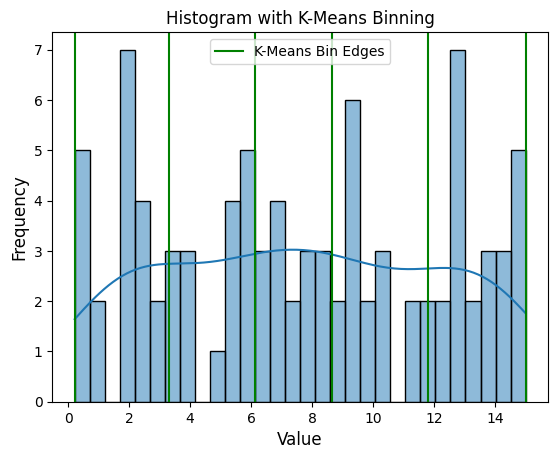

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Пример данных
X = np.random.uniform(0, 15, 100).reshape(-1, 1)

# Разделение на обучающую и тестовую выборки
test_set = X[0:10, 0]
train_set = X[10:, 0]

# Создание модели биннинга по k-средним
model = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
model.fit(train_set.reshape(-1, 1))

# Преобразование данных
transformed_train = model.transform(train_set.reshape(-1, 1)).reshape(-1)
transformed_test = model.transform(test_set.reshape(-1, 1)).reshape(-1)

# Границы интервалов
bin_edges = model.bin_edges_[0]

# Визуализация
fig, ax = plt.subplots()
sns.histplot(train_set, kde=True, bins=30)

for edge in bin_edges:
    line = plt.axvline(edge, color='g')
ax.legend([line], ['K-Means Bin Edges'], fontsize=10)
ax.set_title('Histogram with K-Means Binning', fontsize=12)
ax.set_xlabel('Value', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.show()

###Масштабирование (Scaling)



Масштабирование признаков — это важный этап предварительной обработки данных, особенно когда работают с алгоритмами, чувствительными к величине данных. Разные масштабы признаков могут затруднить их сравнение, особенно в линейных моделях, таких как линейная регрессия и логистическая регрессия. В алгоритмах, таких как k-средних с евклидовым расстоянием или метод ближайших соседей (KNN), масштабирование признаков необходимо, чтобы мера расстояния была осмысленной. Кроме того, для алгоритмов, использующих градиентный спуск, масштабирование может значительно ускорить процесс сходимости.

**Некоторые часто используемые модели**

| Название алгоритма | Требуется масштабирование |
|--------------------|---------------------------|
| SVM, KNN, PCA, K-Means, Линейная регрессия, Логистическая регрессия, Линейный дискриминантный анализ | $\checkmark$ |
| Наивный Байес, Деревья решений и ансамбли на их основе | $\times$ |

*Примечание*: Скошенность данных может влиять на модели PCA, поэтому перед применением PCA может быть полезно использовать степенные преобразования для устранения скошенности.


### Что такое скошенность (skewness)?

**Скошенность** — это мера асимметрии распределения данных. Она показывает, насколько распределение отклоняется от симметричного (например, нормального распределения). В контексте анализа данных и машинного обучения скошенность важна, потому что многие алгоритмы предполагают, что данные распределены нормально или близко к нормальному распределению. Если данные имеют значительную скошенность, это может привести к некорректной работе моделей, особенно тех, которые чувствительны к масштабу и распределению данных (например, линейная регрессия, PCA).

#### Типы скошенности

1. **Нулевая скошенность**:
   - Распределение симметрично.
   - Пример: нормальное распределение.
   - Значение скошенности близко к 0.

2. **Положительная скошенность (правосторонняя)**:
   - Хвост распределения вытянут вправо.
   - Среднее значение больше медианы.
   - Пример: распределение доходов (большинство людей имеют низкий или средний доход, но есть несколько людей с очень высоким доходом).
   - Значение скошенности больше 0.

3. **Отрицательная скошенность (левосторонняя)**:
   - Хвост распределения вытянут влево.
   - Среднее значение меньше медианы.
   - Пример: распределение возраста выхода на пенсию (большинство людей выходят на пенсию в определенном возрасте, но некоторые выходят раньше).
   - Значение скошенности меньше 0.

#### Как измерить скошенность?

Скошенность можно вычислить с помощью формулы:
$$
\text{Скошенность} = \frac{E[(X - \mu)^3]}{\sigma^3}
$$
Где:
- $X$ — данные,
- $\mu$ — среднее значение,
- $\sigma$ — стандартное отклонение,
- $E$ — математическое ожидание.

В Python скошенность можно вычислить с помощью библиотеки `scipy`:



In [ ]:
from scipy.stats import skew
import numpy as np

# Пример данных с положительной скошенностью
data = np.array([1, 2, 2, 3, 3, 3, 4, 4, 5, 10])

# Вычисление скошенности
skewness = skew(data)
print("Скошенность:", skewness)

Скошенность: 1.668933072816137



#### Как скошенность влияет на модели?

1. **Линейные модели**:
   - Линейная регрессия, логистическая регрессия и другие линейные модели предполагают, что данные распределены нормально. Если данные скошены, это может привести к некорректным результатам.

2. **PCA (метод главных компонент)**:
   - PCA чувствителен к скошенности, так как он пытается максимизировать дисперсию данных. Если данные скошены, PCA может выделить не те компоненты, которые действительно важны.

3. **Деревья решений**:
   - Деревья решений и ансамбли на их основе (например, случайный лес, градиентный бустинг) менее чувствительны к скошенности, так как они работают с разбиением данных на основе пороговых значений.

#### Как устранить скошенность?

1. **Логарифмическое преобразование**:
   - Применяется к данным с положительной скошенностью.
   - Формула: $X' = \log(X + 1)$ (добавление 1 позволяет обрабатывать нулевые значения).

2. **Квадратный корень**:
   - Применяется к данным с умеренной положительной скошенностью.
   - Формула: $X' = \sqrt{X}$.

3. **Степенное преобразование (Box-Cox)**:
   - Более гибкий метод, который автоматически подбирает степень преобразования.
   - Формула: $X' = \frac{X^\lambda - 1}{\lambda}$, где $\lambda$ — параметр, который подбирается автоматически.



####1.  Стандартное масштабирование (Z-нормализация)
**Описание метода:**

StandardScaler трансформирует данные таким образом, чтобы их распределение имело среднее значение $\mu = 0$ и стандартное отклонение $\sigma = 1$. Это делается с использованием формулы:

$$
X' = \frac{X - \mu}{\sigma}
$$

Где:
- $\mu$: среднее значение признака.
- $\sigma$: стандартное отклонение признака.

**Особенности:**
- Чувствителен к выбросам, так как они могут значительно сместить среднее значение $\mu$ и увеличить стандартное отклонение $\sigma$.
- Подходит для данных с распределением, близким к нормальному (гауссовскому).

**Применение:**
- Используется в алгоритмах, основанных на допущении нормальности данных: линейная регрессия, логистическая регрессия, метод опорных векторов (SVM), PCA.

**Пример:**
Если данные имеют диапазон [10, 20] со средним $\mu = 15$ и стандартным отклонением $\sigma = 3$, значение 10 после стандартизации будет:
$$
X' = \frac{10 - 15}{3} = -1.67
$$

**Пример кода**:


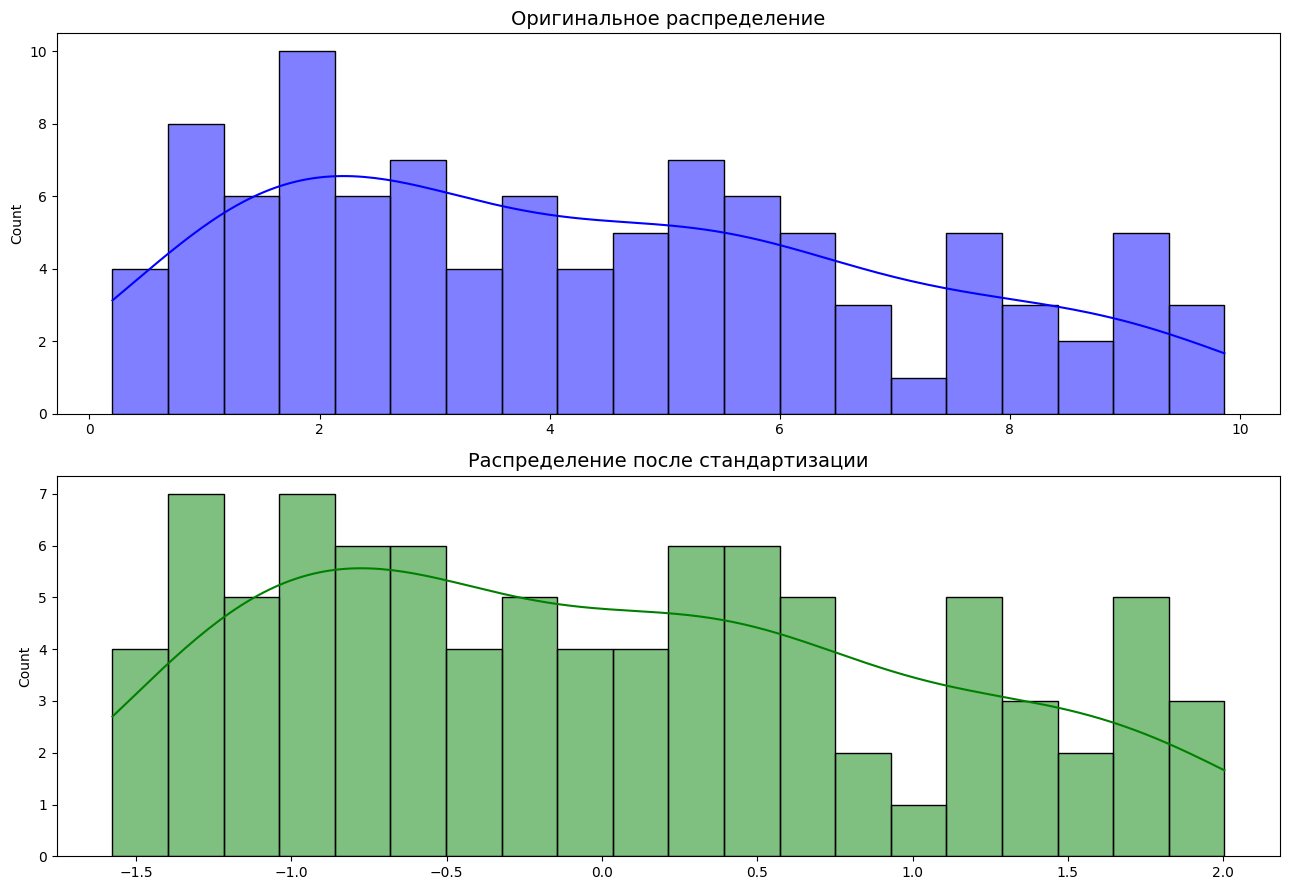

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Пример данных
X = np.random.rand(100, 1) * 10  # Пример: случайные значения в диапазоне [0, 10]

# Разделение на обучающую и тестовую выборки
test_set = X[:10, 0]
train_set = X[10:, 0]

# Инициализация стандартизатора и подгонка на обучающих данных
scaler = StandardScaler()
scaler.fit(train_set.reshape(-1, 1))

# Преобразование обучающей и тестовой выборок
transformed_train = scaler.transform(train_set.reshape(-1, 1)).reshape(-1)
transformed_test = scaler.transform(test_set.reshape(-1, 1)).reshape(-1)

# Визуализация
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 1, figsize=(13, 9))
sns.histplot(X[:, 0], kde=True, ax=ax[0], color="blue", bins=20)
ax[0].set_title("Оригинальное распределение", fontsize=14)

sns.histplot(transformed_train, kde=True, ax=ax[1], color="green", bins=20)
ax[1].set_title("Распределение после стандартизации", fontsize=14)
plt.tight_layout()
plt.show()



#### **2. Min-Max Scaler (Масштабирование в диапазон)**

**Описание метода:**

MinMaxScaler преобразует данные в заданный диапазон (обычно [0, 1]) по формуле:

$$
X' = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}} \cdot (b - a) + a
$$

Где:
- $X_{\text{min}}$: минимальное значение признака.
- $X_{\text{max}}$: максимальное значение признака.
- $a$, $b$: границы целевого диапазона.

**Особенности:**
- Линейно масштабирует данные.
- Чувствителен к выбросам, так как они могут значительно повлиять на $X_{\text{min}}$ и $X_{\text{max}}$.

**Применение:**
- Используется в алгоритмах, где важен абсолютный диапазон значений, например, в нейронных сетях или методе k-средних.

**Пример:**
Если данные имеют диапазон [10, 20] и целевой диапазон [0, 1], значение 15 будет преобразовано следующим образом:
$$
X' = \frac{15 - 10}{20 - 10} \cdot (1 - 0) + 0 = 0.5
$$


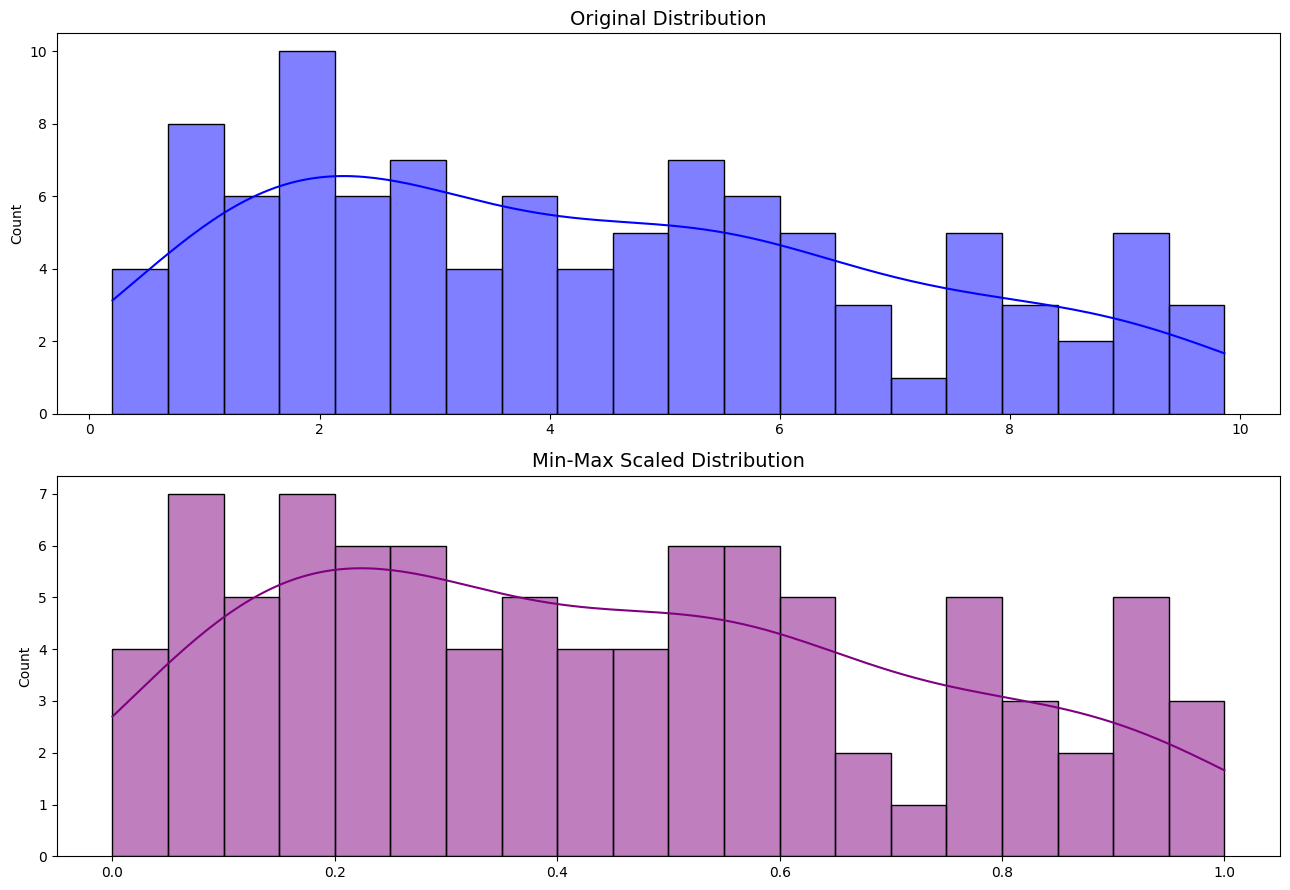

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler with range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(train_set.reshape(-1, 1))

# Transform train and test data
transformed_train = scaler.transform(train_set.reshape(-1, 1)).reshape(-1)
transformed_test = scaler.transform(test_set.reshape(-1, 1)).reshape(-1)

# Visualization
fig, ax = plt.subplots(2, 1, figsize=(13, 9))
sns.histplot(X[:, 0], kde=True, ax=ax[0], color="blue", bins=20)
ax[0].set_title("Original Distribution", fontsize=14)

sns.histplot(transformed_train, kde=True, ax=ax[1], color="purple", bins=20)
ax[1].set_title("Min-Max Scaled Distribution", fontsize=14)
plt.tight_layout()
plt.show()


#### **3. Robust Scaler (Устойчивое масштабирование)**

**Описание метода:**

RobustScaler использует устойчивые к выбросам статистики — медиану и межквартильный размах (IQR):

$$
X' = \frac{X - \text{Медиана}}{\text{IQR}}
$$

Где:
- Медиана — 50-й процентиль.
- IQR (межквартильный размах) = $Q3 - Q1$ (разница между 75-м и 25-м процентилями).

**Особенности:**
- Более устойчив к выбросам, так как они не влияют на медиану и межквартильный размах.
- Подходит для данных с асимметричным (смещенным) распределением.

**Применение:**
- Применяется в задачах, где данные содержат выбросы или распределение сильно отличается от нормального.

**Пример:**
Если данные имеют медиану $\text{Медиана} = 15$, первый квартиль $Q1 = 10$, и третий квартиль $Q3 = 20$, значение 25 будет преобразовано следующим образом:
$$
X' = \frac{25 - 15}{20 - 10} = 1.0
$$


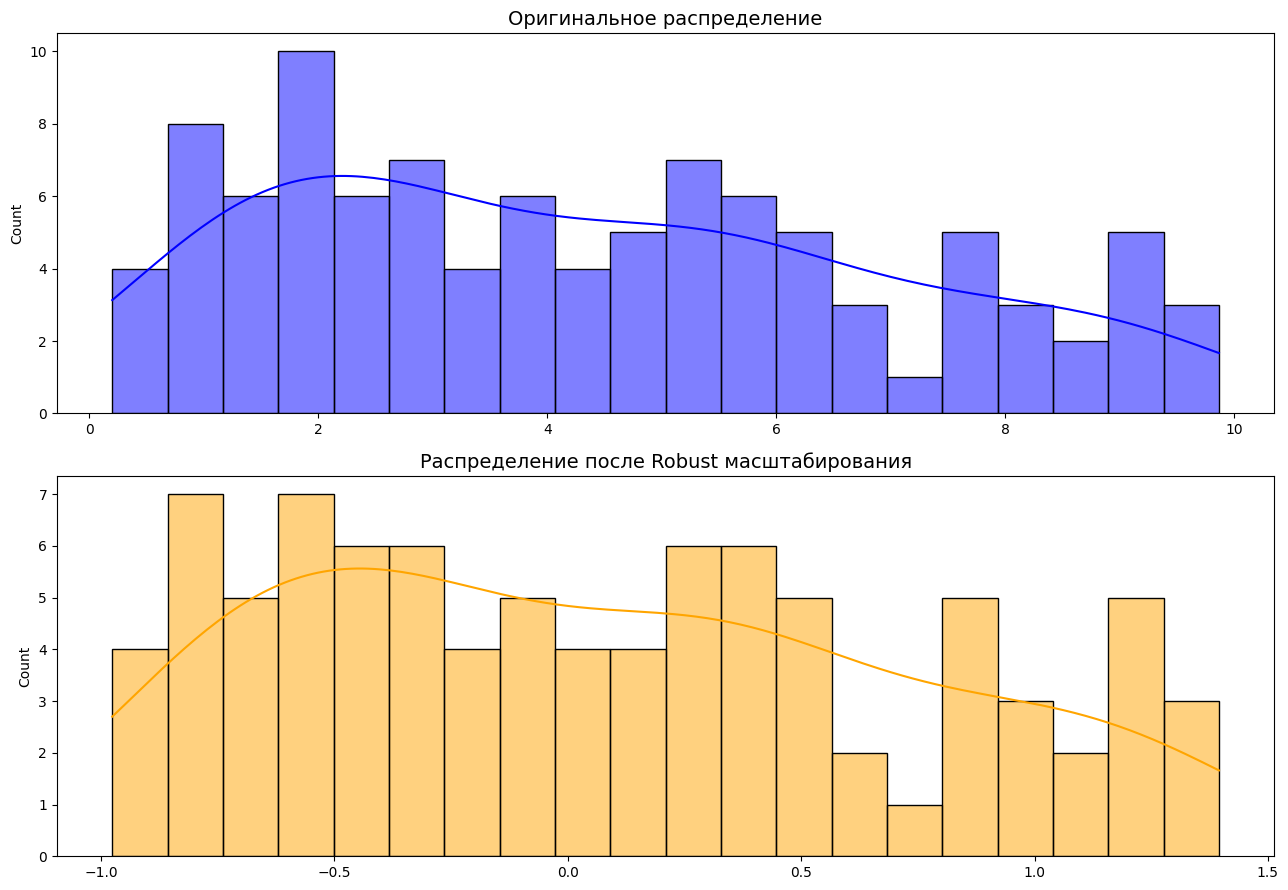

In [ ]:
from sklearn.preprocessing import RobustScaler

# Инициализация масштабатора с диапазоном квартилей (25%, 75%)
scaler = RobustScaler()
scaler.fit(train_set.reshape(-1, 1))

# Преобразование обучающей и тестовой выборок
transformed_train = scaler.transform(train_set.reshape(-1, 1)).reshape(-1)
transformed_test = scaler.transform(test_set.reshape(-1, 1)).reshape(-1)

# Визуализация
fig, ax = plt.subplots(2, 1, figsize=(13, 9))
sns.histplot(X[:, 0], kde=True, ax=ax[0], color="blue", bins=20)
ax[0].set_title("Оригинальное распределение", fontsize=14)

sns.histplot(transformed_train, kde=True, ax=ax[1], color="orange", bins=20)
ax[1].set_title("Распределение после Robust масштабирования", fontsize=14)
plt.tight_layout()
plt.show()


#### **4. MaxAbsScaler (Масштабирование по модулю максимума)**

**Описание метода:**

MaxAbsScaler масштабирует данные по модулю их максимального абсолютного значения:

$$
X' = \frac{X}{|X_{\text{max}}|}
$$

Где:
- $X_{\text{max}}$: максимальное абсолютное значение признака.

**Особенности:**
- Линейно масштабирует данные в диапазон [-1, 1].
- Не изменяет центровку данных (не вычитает среднее).

**Применение:**
- Используется для разреженных данных, где важно сохранить нулевые значения.

**Пример:**
Если данные имеют диапазон [-10, 20], значение 15 будет преобразовано в:
$$
X' = \frac{15}{20} = 0.75
$$


Исходная обучающая выборка:
 [[  5.  10.]
 [ 15.  20.]
 [ -5. -10.]]
Масштабированная обучающая выборка:
 [[ 0.33333333  0.5       ]
 [ 1.          1.        ]
 [-0.33333333 -0.5       ]]
Исходная тестовая выборка:
 [[-10. -20.]
 [  0.   0.]]
Масштабированная тестовая выборка:
 [[-0.66666667 -1.        ]
 [ 0.          0.        ]]


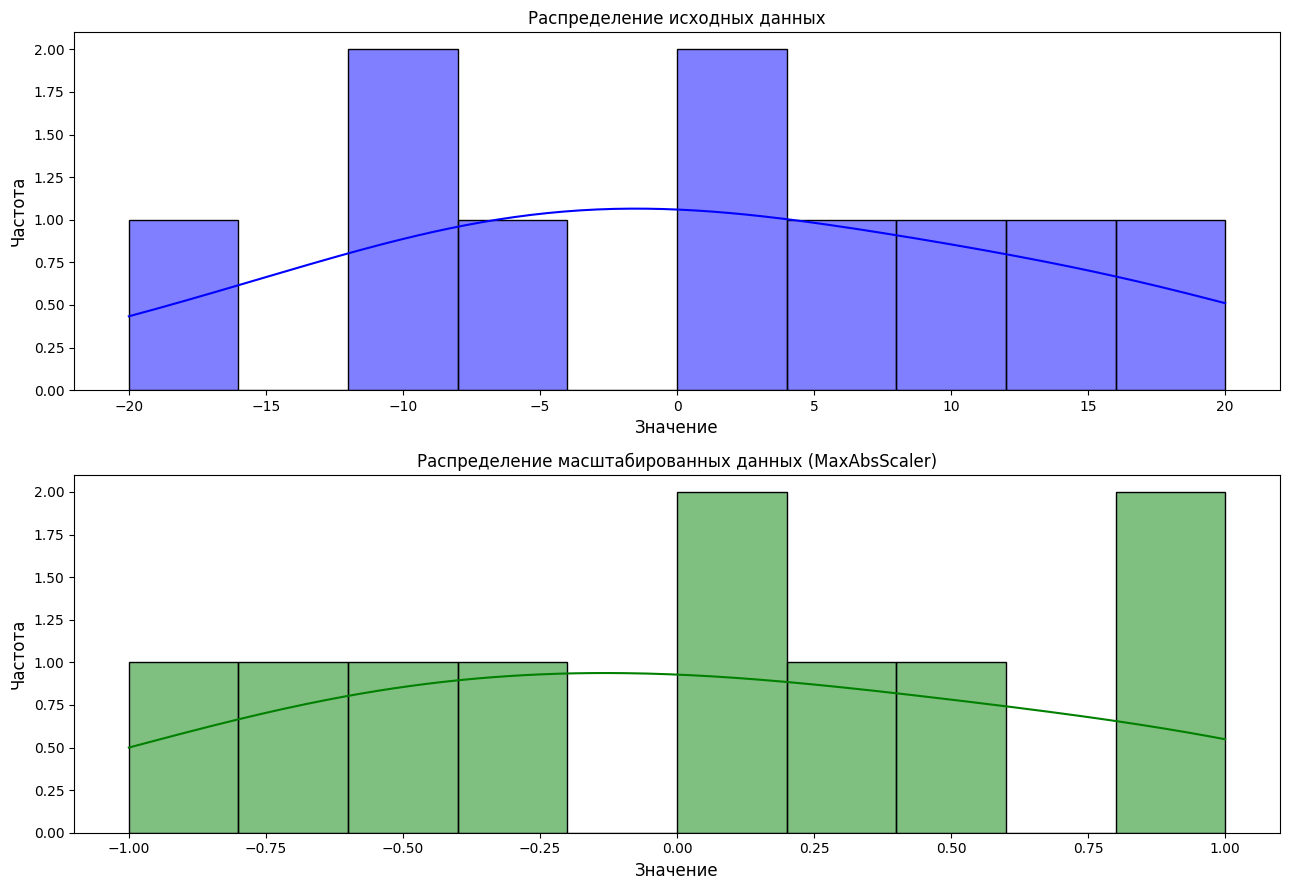

In [ ]:
import numpy as np
from sklearn.preprocessing import MaxAbsScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Пример данных
# Данные могут содержать как положительные, так и отрицательные значения
X = np.array([
    [-10, -20],
    [0, 0],
    [5, 10],
    [15, 20],
    [-5, -10]
], dtype=float)

# Разделение на обучающую и тестовую выборки
# Берем первые два ряда как тестовую выборку, остальные — обучающую
test_set = X[:2]
train_set = X[2:]

# Создание и настройка MaxAbsScaler
scaler = MaxAbsScaler()

# Подгонка на обучающей выборке и масштабирование тестовой выборки
scaler.fit(train_set)  # Fit на обучающей выборке
transformed_train = scaler.transform(train_set)  # Масштабируем обучающую выборку
transformed_test = scaler.transform(test_set)    # Масштабируем тестовую выборку

# Демонстрация результатов
print("Исходная обучающая выборка:\n", train_set)
print("Масштабированная обучающая выборка:\n", transformed_train)
print("Исходная тестовая выборка:\n", test_set)
print("Масштабированная тестовая выборка:\n", transformed_test)

# Визуализация распределения данных до и после масштабирования
fig, ax = plt.subplots(2, 1, figsize=(13, 9))

# Распределение оригинальных данных
sns.histplot(X.flatten(), bins=10, kde=True, ax=ax[0], color="blue")
ax[0].set_title("Распределение исходных данных", fontsize=12)
ax[0].set_xlabel("Значение", fontsize=12)
ax[0].set_ylabel("Частота", fontsize=12)

# Масштабированные данные
scaled_X = scaler.transform(X)
sns.histplot(scaled_X.flatten(), bins=10, kde=True, ax=ax[1], color="green")
ax[1].set_title("Распределение масштабированных данных (MaxAbsScaler)", fontsize=12)
ax[1].set_xlabel("Значение", fontsize=12)
ax[1].set_ylabel("Частота", fontsize=12)

fig.tight_layout()
plt.show()


### Сравнительная таблица методов:

| Метод               | Чувствительность к выбросам | Центровка данных | Подходит для каких алгоритмов             | Диапазон результатов          |
|---------------------|----------------------------|------------------|------------------------------------------|--------------------------------|
| Standard Scaler     | Высокая                   | Да               | Линейные модели, SVM, PCA                | $(-\infty, +\infty)$       |
| Min-Max Scaler      | Высокая                   | Нет              | KNN, нейронные сети, k-средние           | [a, b] (например, [0, 1])     |
| Robust Scaler       | Низкая                    | Да               | Линейные модели, чувствительные к выбросам | $(-\infty, +\infty)$       |
| MaxAbsScaler        | Средняя                   | Нет              | Разреженные данные                       | [-1, 1]                        |

### Заключение

1. **Выбор метода зависит от характера данных**:
   - Если данные имеют выбросы, используйте **RobustScaler**.
   - Для нормального распределения подходят **StandardScaler** и **MinMaxScaler**.
   - Для разреженных данных лучше использовать **MaxAbsScaler**.
2. Масштабирование обязательно, если модель чувствительна к масштабу признаков (например, SVM, PCA, KNN).

#### Преобразование мощности (нелинейная трансформация)

Методы масштабирования, такие как Min-Max или стандартизация, сохраняют исходное распределение данных. Однако многие статистические модели предполагают, что данные распределены нормально. Для достижения этого можно применить **преобразование мощности**, которое модифицирует распределение, приближая его к нормальному.

### Преобразование Бокса-Кокса

**Преобразование Бокса-Кокса** применяется только к положительным данным. Оно определяется следующим образом:  
$$
x_i(\lambda) =
\begin{cases}
\frac{x_i^\lambda - 1}{\lambda}, & \text{если } \lambda \neq 0 \\
\ln(x_i), & \text{если } \lambda = 0
\end{cases}
$$

Параметр $\lambda$ оптимизируется с использованием метода максимального правдоподобия (MLE) для стабилизации дисперсии и уменьшения асимметрии.

**Пример с кодом:**


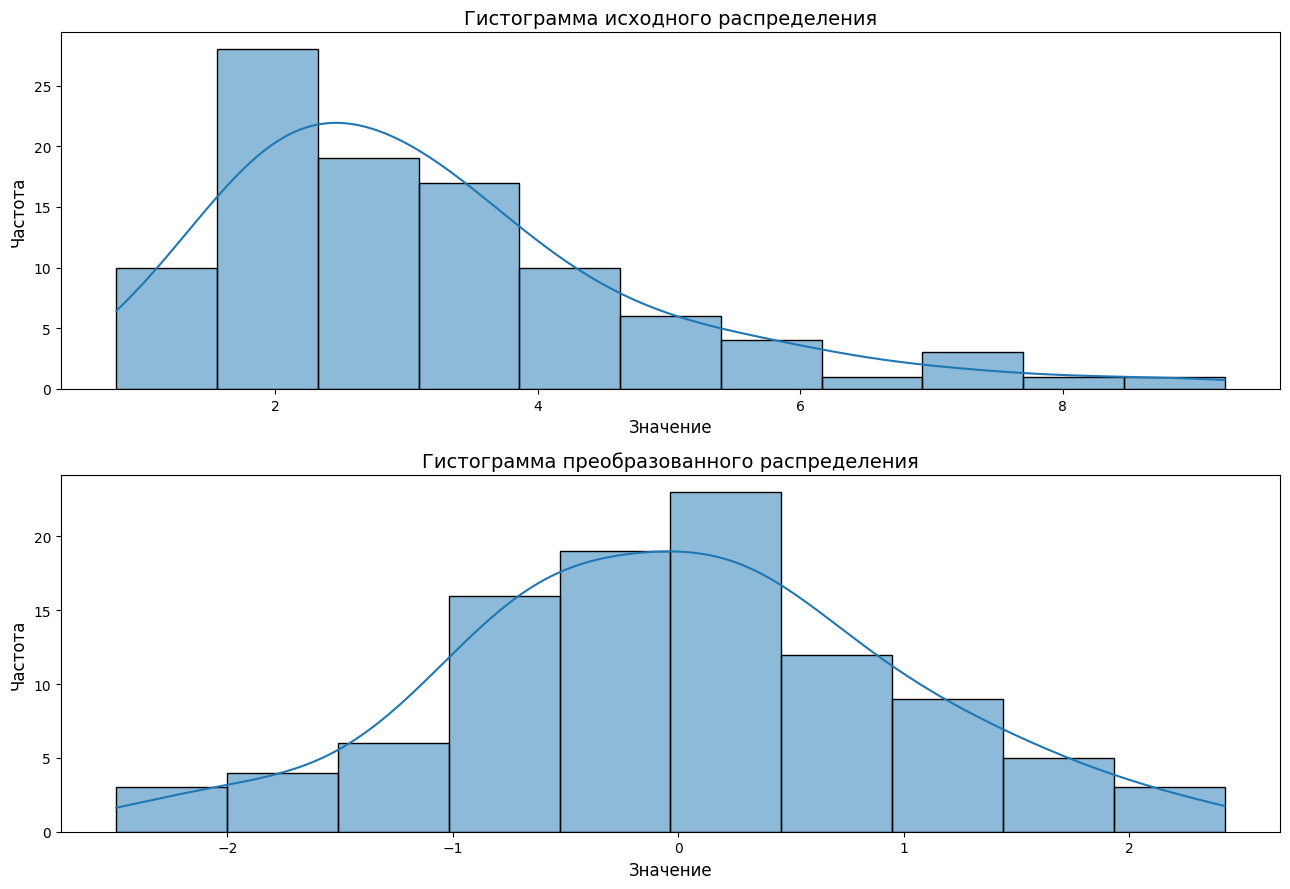

In [ ]:
import numpy as np
from sklearn.preprocessing import PowerTransformer
import seaborn as sns
import matplotlib.pyplot as plt

# Пример данных
X = np.random.lognormal(mean=1.0, sigma=0.5, size=(100, 1))

# Разделение данных на обучающую и тестовую выборки
test_set = X[:10, 0]
train_set = X[10:, 0]

# Инициализация PowerTransformer с методом Box-Cox
model = PowerTransformer(method='box-cox', standardize=True)

# Обучение на обучающей выборке и преобразование обеих выборок
model.fit(train_set.reshape(-1, 1))
transformed_train = model.transform(train_set.reshape(-1, 1)).flatten()
transformed_test = model.transform(test_set.reshape(-1, 1)).flatten()

# Визуализация распределения до и после преобразования
fig, ax = plt.subplots(2, 1, figsize=(13, 9))

# Исходное распределение
sns.histplot(X[:, 0], kde=True, ax=ax[0])
ax[0].set_title('Гистограмма исходного распределения', fontsize=14)
ax[0].set_xlabel('Значение', fontsize=12)
ax[0].set_ylabel('Частота', fontsize=12)

# Преобразованное распределение
sns.histplot(model.transform(X).flatten(), kde=True, ax=ax[1])
ax[1].set_title('Гистограмма преобразованного распределения', fontsize=14)
ax[1].set_xlabel('Значение', fontsize=12)
ax[1].set_ylabel('Частота', fontsize=12)

plt.tight_layout()
plt.show()



### Преобразование Йео-Джонсона

В отличие от Box-Cox, **преобразование Йео-Джонсона** поддерживает как положительные, так и отрицательные значения. Оно определяется следующим образом:  
$$
x_i(\lambda) =
\begin{cases}
\frac{(x_i + 1)^\lambda - 1}{\lambda}, & \lambda \neq 0, x_i \geq 0 \\
\ln(x_i + 1), & \lambda = 0, x_i \geq 0 \\
-\frac{(-x_i + 1)^{2 - \lambda} - 1}{2 - \lambda}, & \lambda \neq 2, x_i < 0 \\
-\ln(-x_i + 1), & \lambda = 2, x_i < 0
\end{cases}
$$

Как и в случае с Box-Cox, $\lambda$ оптимизируется с использованием MLE.

**Пример с кодом:**


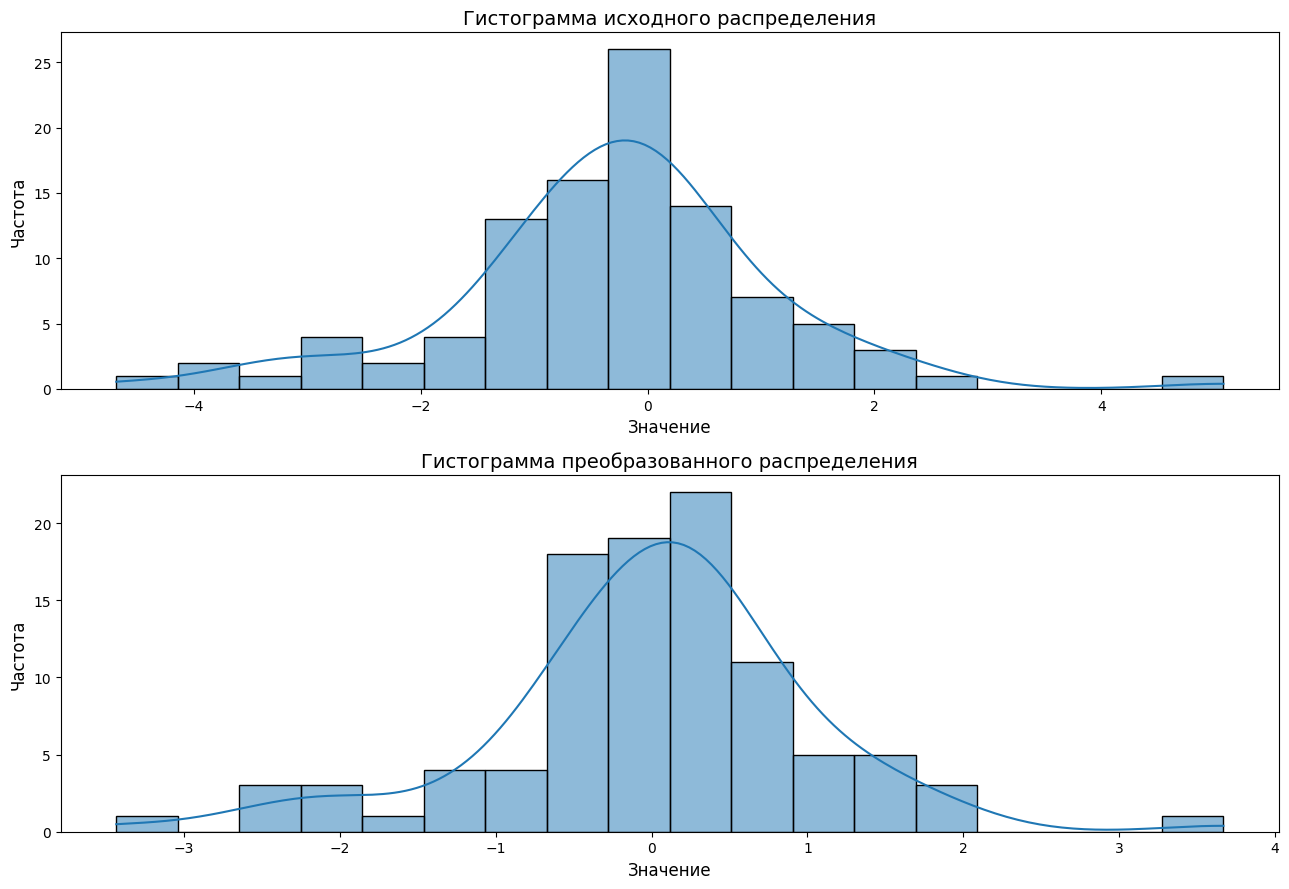

In [ ]:
# Пример данных с отрицательными значениями
X = np.random.laplace(loc=0.0, scale=1.0, size=(100, 1))

# Разделение данных на обучающую и тестовую выборки
test_set = X[:10, 0]
train_set = X[10:, 0]

# Инициализация PowerTransformer с методом Yeo-Johnson
model = PowerTransformer(method='yeo-johnson', standardize=True)

# Обучение на обучающей выборке и преобразование обеих выборок
model.fit(train_set.reshape(-1, 1))
transformed_train = model.transform(train_set.reshape(-1, 1)).flatten()
transformed_test = model.transform(test_set.reshape(-1, 1)).flatten()

# Визуализация распределения до и после преобразования
fig, ax = plt.subplots(2, 1, figsize=(13, 9))

# Исходное распределение
sns.histplot(X[:, 0], kde=True, ax=ax[0])
ax[0].set_title('Гистограмма исходного распределения', fontsize=14)
ax[0].set_xlabel('Значение', fontsize=12)
ax[0].set_ylabel('Частота', fontsize=12)

# Преобразованное распределение
sns.histplot(model.transform(X).flatten(), kde=True, ax=ax[1])
ax[1].set_title('Гистограмма преобразованного распределения', fontsize=14)
ax[1].set_xlabel('Значение', fontsize=12)
ax[1].set_ylabel('Частота', fontsize=12)

plt.tight_layout()
plt.show()



### Основные наблюдения:

1. **Преобразование Box-Cox:**
   - Подходит только для положительных значений.
   - Эффективно для данных с положительной асимметрией.

2. **Преобразование Йео-Джонсона:**
   - Подходит для положительных и отрицательных значений.
   - Универсально для наборов данных со смешанным распределением.



### Дополнительный пример – сравнение двух методов


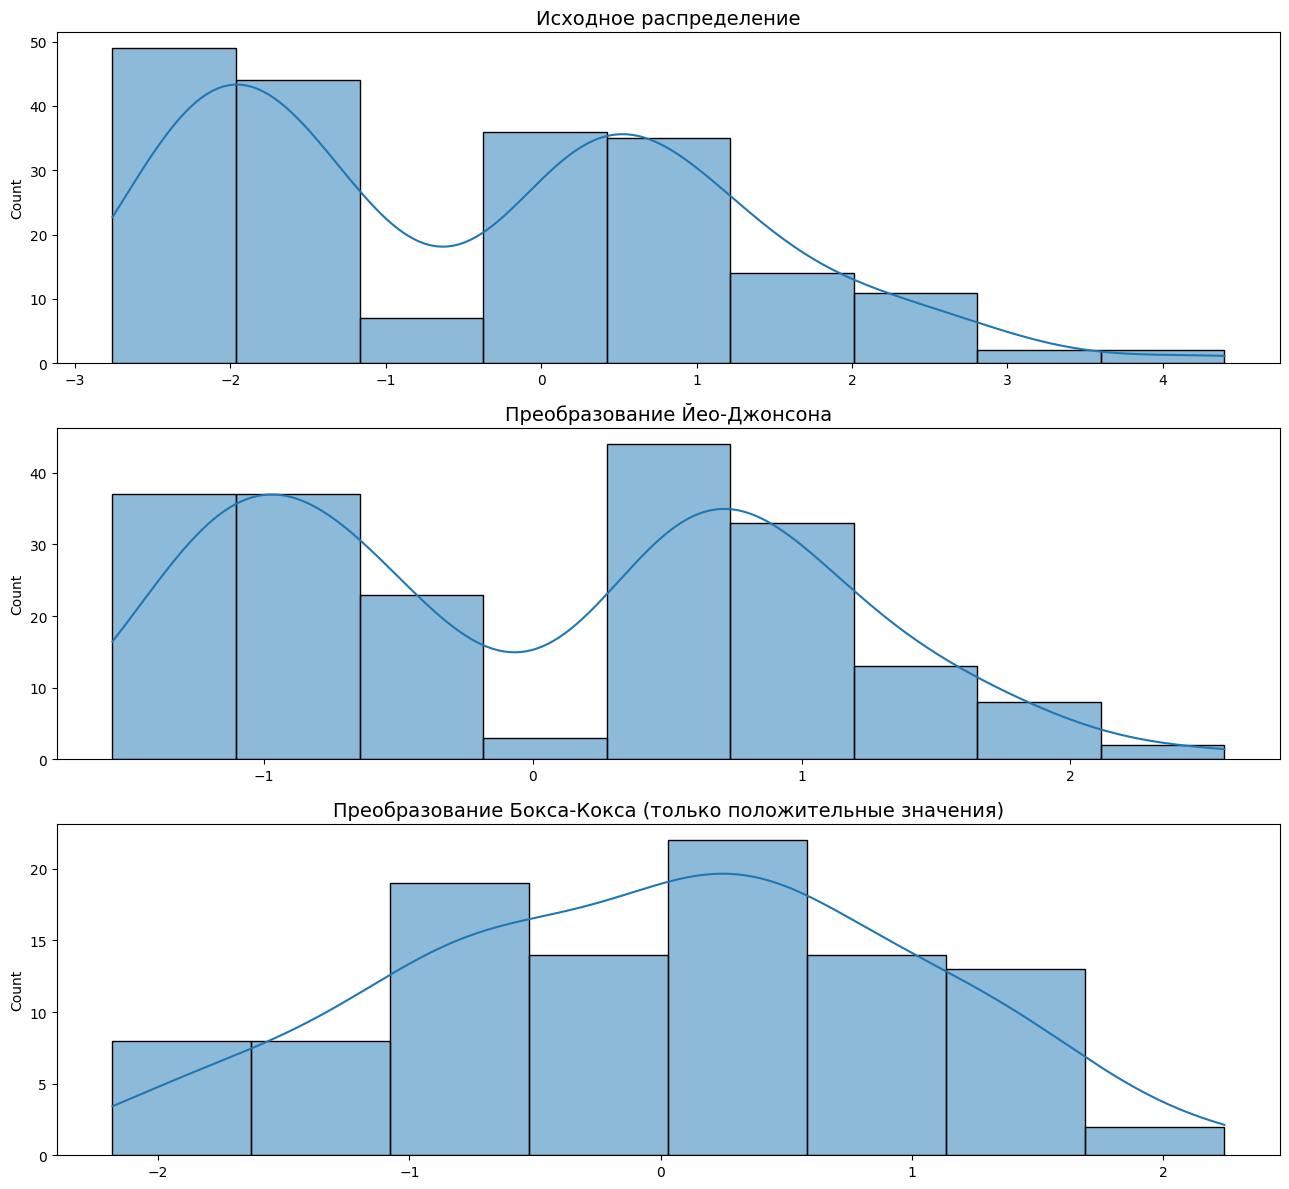

In [ ]:
# Генерация набора данных
X = np.concatenate([np.random.exponential(scale=1.0, size=100),
                    np.random.normal(loc=-2.0, scale=0.5, size=100)]).reshape(-1, 1)

# Применение обоих преобразований
model_boxcox = PowerTransformer(method='box-cox', standardize=True)
model_yeojohnson = PowerTransformer(method='yeo-johnson', standardize=True)

# Обучение и преобразование
transformed_boxcox = model_boxcox.fit_transform(X[X > 0].reshape(-1, 1))
transformed_yeojohnson = model_yeojohnson.fit_transform(X)

# Визуализация
fig, ax = plt.subplots(3, 1, figsize=(13, 12))

sns.histplot(X.flatten(), kde=True, ax=ax[0])
ax[0].set_title('Исходное распределение', fontsize=14)

sns.histplot(transformed_yeojohnson.flatten(), kde=True, ax=ax[1])
ax[1].set_title('Преобразование Йео-Джонсона', fontsize=14)

sns.histplot(transformed_boxcox.flatten(), kde=True, ax=ax[2])
ax[2].set_title('Преобразование Бокса-Кокса (только положительные значения)', fontsize=14)

plt.tight_layout()
plt.show()


### Нормализация (Normalization)

Все методы масштабирования, упомянутые ранее, выполняют операции для каждого столбца по отдельности. Однако нормализация работает с каждой строкой, пытаясь "масштабировать" каждый пример так, чтобы он имел норму единицы. Поскольку нормализация применяется к каждой строке, она может исказить отношения между признаками, поэтому ее не так часто используют в задачах регрессии. Однако нормализация оказывается полезной в задачах классификации текста и кластеризации.

#### Формулы нормализации

Пусть $X[i][j]$ представляет значение признака $j$ для объекта $i$.  

- **L1-норма**:  
$$
  X[i][j] = \frac{X[i][j]}{\sum_{j=1}^m |X[i][j]|}
$$

- **L2-норма**:  
$$
  X[i][j] = \frac{X[i][j]}{\sqrt{\sum_{j=1}^m X[i][j]^2}}
$$

Здесь $m$ — количество признаков.

#### L1 Нормализация

##### Пример
Рассмотрим массив данных:  
$$
X = \begin{bmatrix}
8.3252 & 41 & 6.9841 \\
8.3014 & 21 & 6.2381
\end{bmatrix}
$$

Вычислим нормализацию для каждой строки с использованием L1-нормы:  
Для первой строки:  
$$
\text{Сумма} = 8.3252 + 41 + 6.9841 = 56.3093
$$
Нормализованные значения:  
$$
\left[\frac{8.3252}{56.3093}, \frac{41}{56.3093}, \frac{6.9841}{56.3093}\right] = [0.1478, 0.7281, 0.1240]
$$

Для второй строки:  
$$
\text{Сумма} = 8.3014 + 21 + 6.2381 = 35.5395
$$
Нормализованные значения:  
$$
\left[\frac{8.3014}{35.5395}, \frac{21}{35.5395}, \frac{6.2381}{35.5395}\right] = [0.2336, 0.5909, 0.1755]
$$

##### Код реализации

In [ ]:
import numpy as np
from sklearn.preprocessing import Normalizer

# Данные
X = np.array([
    [8.3252, 41, 6.9841],
    [8.3014, 21, 6.2381]
])

# L1-нормализация
model = Normalizer(norm='l1')
result = model.fit_transform(X)

print("Результат нормализации (L1):\n", result)

Результат нормализации (L1):
 [[0.14784769 0.72812129 0.12403102]
 [0.23358235 0.59089182 0.17552582]]



#### L2 Нормализация

##### Пример
Для тех же данных $X$:  
Для первой строки:  
$$
\text{Сумма квадратов} = 8.3252^2 + 41^2 + 6.9841^2 = 1741.42
$$
Нормализованные значения:  
$$
\left[\frac{8.3252}{\sqrt{1741.42}}, \frac{41}{\sqrt{1741.42}}, \frac{6.9841}{\sqrt{1741.42}}\right] = [0.1963, 0.9666, 0.1647]
$$

Для второй строки:  
$$
\text{Сумма квадратов} = 8.3014^2 + 21^2 + 6.2381^2 = 547.11
$$
Нормализованные значения:  
$$
\left[\frac{8.3014}{\sqrt{547.11}}, \frac{21}{\sqrt{547.11}}, \frac{6.2381}{\sqrt{547.11}}\right] = [0.3544, 0.8964, 0.2663]
$$

##### Код реализации

In [ ]:
# L2-нормализация
model = Normalizer(norm='l2')
result = model.fit_transform(X)

print("Результат нормализации (L2):\n", result)

Результат нормализации (L2):
 [[0.19627665 0.96662455 0.1646586 ]
 [0.35435091 0.8963993  0.26627755]]




### Визуализация распределений

Сравним распределения данных после нормализации и масштабирования методом `RobustScaler`.

##### Код


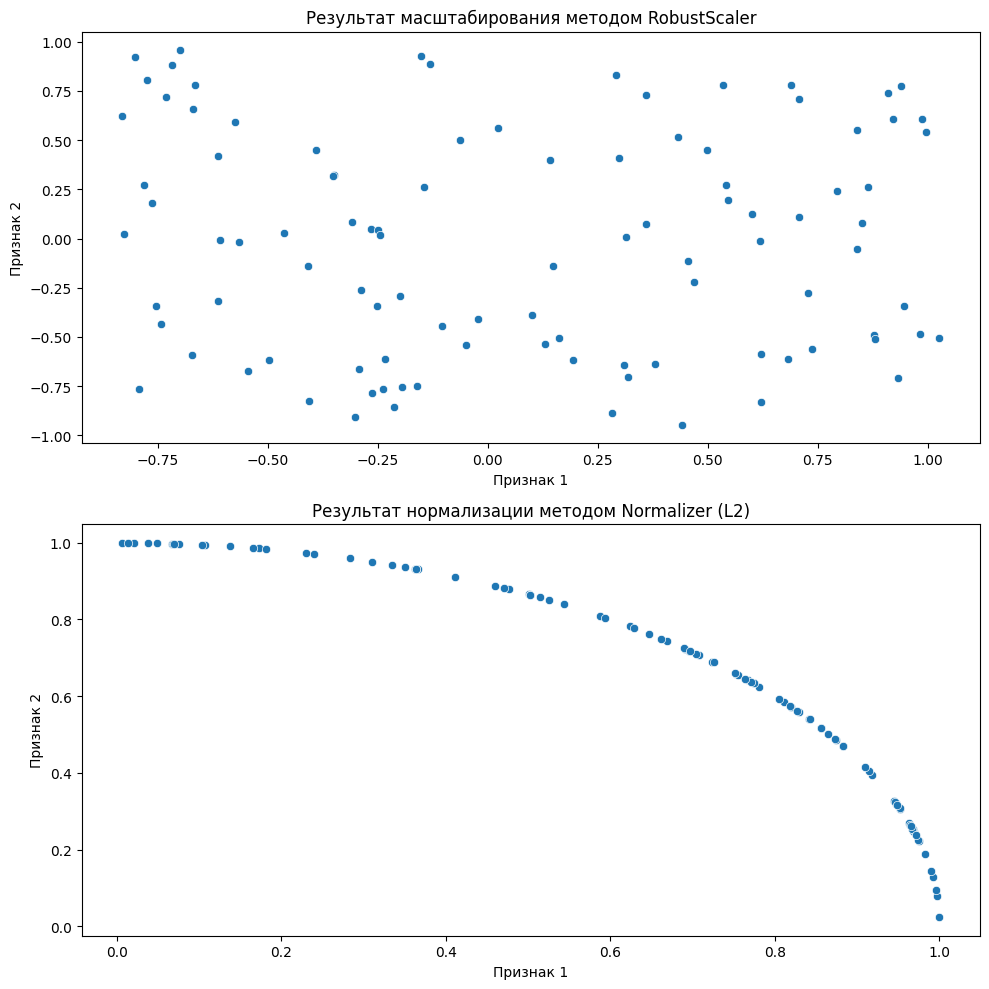

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

# Генерация случайных данных
np.random.seed(42)
X = np.random.rand(100, 2) * 100

# RobustScaler
robust_scaler = RobustScaler()
robust_result = robust_scaler.fit_transform(X)

# Normalizer (L2)
normalizer = Normalizer(norm='l2')
normalized_result = normalizer.fit_transform(X)

# Визуализация
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Scatter Plot для RobustScaler
sns.scatterplot(x=robust_result[:, 0], y=robust_result[:, 1], ax=ax[0])
ax[0].set_title('Результат масштабирования методом RobustScaler')
ax[0].set_xlabel('Признак 1')
ax[0].set_ylabel('Признак 2')

# Scatter Plot для Normalizer
sns.scatterplot(x=normalized_result[:, 0], y=normalized_result[:, 1], ax=ax[1])
ax[1].set_title('Результат нормализации методом Normalizer (L2)')
ax[1].set_xlabel('Признак 1')
ax[1].set_ylabel('Признак 2')

plt.tight_layout()
plt.show()

### Импутация пропущенных значений

Пропущенные значения в данных могут негативно повлиять на обучение моделей машинного обучения, так как большинство алгоритмов требуют наличия полных данных. Рассмотрим различные подходы к обработке пропусков.



### Одномерная импутация (Univariate Imputation)

Одномерная импутация заменяет пропуски в каждом признаке отдельно, используя константное значение или статистику (среднее, медиана, мода). Этот подход считается простым, но он игнорирует зависимость между признаками.

#### **Импутация среднего значения**
Пропущенные значения заменяются средним всех известных значений в признаке.  
**Формула:**

$$
x_{\text{imputed}} = \frac{\sum_{i=1}^{n} x_i}{n}, \quad x_i \neq \text{NaN}
$$


In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

# Пример данных
X = np.array([[1.0], [2.0], [np.nan], [4.0]])

# Импутатор среднего значения
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

print("Данные после импутации:\n", X_imputed)

Данные после импутации:
 [[1.        ]
 [2.        ]
 [2.33333333]
 [4.        ]]



#### **Импутация медианы**
Медиана устойчивее к выбросам по сравнению со средним. Для вычисления медианы сортируются непустые значения, и берётся центральное.  

#### **Импутация моды**
Мода — наиболее часто встречающееся значение. Подходит для категориальных признаков.

#### **Импутация константой**
Заменяет пропуски фиксированным значением. Пример:


In [ ]:
imputer = SimpleImputer(strategy='constant', fill_value=-1)
X_imputed = imputer.fit_transform(X)

print("Данные после импутации:\n", X_imputed)

Данные после импутации:
 [[ 1.]
 [ 2.]
 [-1.]
 [ 4.]]



### Многомерная импутация (Multivariate Imputation)

Этот метод учитывает взаимосвязь между признаками. Он итеративно обучает модели, используя известные значения, чтобы предсказать пропуски. Подход сложнее, но даёт точные результаты.

#### **Пример 1: Использование линейных регрессоров**


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

# Данные с пропусками
X = np.array([[1, 2], [3, np.nan], [np.nan, 6], [7, 8]])

# Импутация с BayesianRidge
imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=10, random_state=0)
X_imputed = imputer.fit_transform(X)

print("После импутации:\n", X_imputed)

После импутации:
 [[1.         2.        ]
 [3.         4.00009085]
 [4.99968231 6.        ]
 [7.         8.        ]]



#### **Пример 2: Использование деревьев решений**
Модель ExtraTreesRegressor может эффективно учитывать нелинейные зависимости:


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

imputer = IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=10), random_state=42)
X_imputed = imputer.fit_transform(X)

print("После импутации:\n", X_imputed)

После импутации:
 [[1.  2. ]
 [3.  4.4]
 [5.  6. ]
 [7.  8. ]]


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(



#### **Особенности многомерной импутации:**
- Подходит для данных с сильной взаимозависимостью между признаками.
- Может быть ресурсоёмкой.



### Метод ближайших соседей (K-Nearest Neighbors)

Использует $k$-ближайших соседей для заполнения пропусков. Значение заполняется на основе среднего или медианы значений соседей.

**Формула для среднего:**

$$
x_{\text{imputed}} = \frac{1}{k} \sum_{i=1}^{k} x_i
$$


In [ ]:
from sklearn.impute import KNNImputer

# Данные с пропусками
X = np.array([[1, 2], [3, np.nan], [np.nan, 6], [7, 8]])

# Импутатор KNN
imputer = KNNImputer(n_neighbors=2)
X_imputed = imputer.fit_transform(X)

print("После импутации KNN:\n", X_imputed)

После импутации KNN:
 [[1. 2.]
 [3. 5.]
 [4. 6.]
 [7. 8.]]




**Особенности:**
- Подходит для данных с похожими масштабами.
- Эффективен для небольших наборов данных.



### Пометка пропусков

Иногда полезно добавить бинарную переменную, показывающую, где были пропуски. Это может быть сделано с помощью `MissingIndicator`.


In [ ]:
from sklearn.impute import MissingIndicator

X = np.array([[1, np.nan], [3, 4], [np.nan, 6]])

indicator = MissingIndicator(missing_values=np.nan)
missing_mask = indicator.fit_transform(X)

print("Матрица пропусков:\n", missing_mask)

Матрица пропусков:
 [[False  True]
 [False False]
 [ True False]]




### Практические советы
1. **Импутация до разбиения данных:** Никогда не обучайте импутатор на всей выборке. Разделите данные на обучающие и тестовые, а затем обучите импутатор только на обучающих данных.
2. **Выбор метода:**
   - Простые методы (среднее, медиана) подходят для быстрого заполнения пропусков.
   - Многомерные методы лучше, если признаки связаны.
   - KNN полезен для небольших наборов данных.
3. **Сложные зависимости:** Для учёта нелинейных взаимосвязей используйте деревья решений или ансамблевые методы.





### Feature Transformation (Преобразование признаков)

#### Polynomial Transformation (Полиномиальное преобразование)

Полиномиальные преобразования используются для введения нелинейных признаков в модель, что позволяет увеличить сложность модели. Для простых линейных моделей это может значительно улучшить их способность моделировать сложные зависимости. Однако для более сложных моделей, таких как модели машинного обучения на основе деревьев решений, это преобразование часто менее эффективно, так как они уже могут учитывать нелинейные зависимости в своей непараметрической структуре.

Если, например, мы задаем степень полинома $d = 3$ и включаем межпризнаковые взаимодействия, то из набора признаков \((X_1, X_2)\) мы получим новые признаки:

$$
(X_1, X_2) \to (1, X_1, X_2, X_1^2, X_1 X_2, X_2^2, X_1^3, X_1^2 X_2, X_1 X_2^2, X_2^3)
$$

**Реализация на Python:**


In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# Пример данных
train_set = np.array([2, 3]).reshape(1, -1)  # Входные данные (1, 2)
test_set = np.array([4, 3]).reshape(1, -1)   # Входные данные (1, 2)

# Полиномиальное преобразование степени 3
poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=True)

# Преобразование данных
transformed_train = poly.fit_transform(train_set)  # Полиномиальные признаки для train_set
transformed_test = poly.fit_transform(test_set)    # Полиномиальные признаки для test_set

print("Исходный train_set:", train_set)
print("Преобразованный train_set:", transformed_train)

print("Исходный test_set:", test_set)
print("Преобразованный test_set:", transformed_test)

Исходный train_set: [[2 3]]
Преобразованный train_set: [[ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Исходный test_set: [[4 3]]
Преобразованный test_set: [[ 1.  4.  3. 16. 12.  9. 64. 48. 36. 27.]]



**Вывод:**

Для `train_set = [2, 3]`, преобразованный набор данных:

$$
\text{transformed\_train} = \text{array}([[1., 2., 3., 4., 6., 9., 8., 12., 18., 27.]])
$$

Это соответствует перечисленным выше полиномиальным терминам.  

**Пример числового расчета:**
- $1$ — единичный сдвиг (bias).
- $X_1 = 2, X_2 = 3$.
- $X_1^2 = 4, X_1 X_2 = 6, X_2^2 = 9$.
- $X_1^3 = 8, X_1^2 X_2 = 12, X_1 X_2^2 = 18, X_2^3 = 27$.




#### Custom Transformation (Пользовательские преобразования)

Иногда требуется применить нестандартное преобразование признаков. Для этого в библиотеке `scikit-learn` есть класс `FunctionTransformer`, который позволяет реализовывать пользовательские преобразования, такие как логарифмическое, экспоненциальное или другие функции.

Пример: преобразование $\log(1 + x)$.

**Реализация на Python:**


In [ ]:
from sklearn.preprocessing import FunctionTransformer

# Пример данных
train_set = np.array([2, 3]).reshape(1, -1)  # Входные данные (1, 2)
test_set = np.array([4, 3]).reshape(1, -1)   # Входные данные (1, 2)

# Логарифмическое преобразование
transformer = FunctionTransformer(func=np.log1p, validate=True)  # log(1 + x)

# Преобразование данных
transformed_train = transformer.fit_transform(train_set)
transformed_test = transformer.fit_transform(test_set)

print("Исходный train_set:", train_set)
print("Преобразованный train_set:", transformed_train)

print("Исходный test_set:", test_set)
print("Преобразованный test_set:", transformed_test)

Исходный train_set: [[2 3]]
Преобразованный train_set: [[1.09861229 1.38629436]]
Исходный test_set: [[4 3]]
Преобразованный test_set: [[1.60943791 1.38629436]]



**Вывод:**

Для `train_set = [2, 3]`, преобразованный набор данных:

$$
\text{transformed\_train} = \text{array}([[1.09861229, 1.38629436]])
$$

Это эквивалентно:

$$
\log(1+2) = 1.09861229, \quad \log(1+3) = 1.38629436
$$

**Пример пользовательской функции:**

Допустим, мы хотим применить экспоненциальное преобразование $\exp(x)$:


In [ ]:
# Экспоненциальное преобразование
exp_transformer = FunctionTransformer(func=np.exp, validate=True)

# Преобразование данных
transformed_train_exp = exp_transformer.fit_transform(train_set)
transformed_test_exp = exp_transformer.fit_transform(test_set)

print("Экспоненциальное преобразование train_set:", transformed_train_exp)
print("Экспоненциальное преобразование test_set:", transformed_test_exp)

Экспоненциальное преобразование train_set: [[ 7.3890561  20.08553692]]
Экспоненциальное преобразование test_set: [[54.59815003 20.08553692]]





**Рекомендации по использованию:**
1. Полиномиальные признаки подходят для линейных моделей, чтобы учесть нелинейные зависимости.
2. Пользовательские преобразования позволяют адаптироваться под особенности данных (например, для работы с логарифмами, экспонентами и т.д.).
3. Для более сложных моделей, таких как Random Forest или Gradient Boosting, эти преобразования менее полезны, так как модели сами определяют сложные зависимости.



### Статические категориальные переменные

В реальных наборах данных часто встречаются категориальные признаки. Однако многие модели машинного обучения, особенно в библиотеке scikit-learn, работают только с числовыми признаками. Поэтому необходимо преобразовывать категориальные признаки в числовые. Хотя современные модели, такие как LightGBM и CatBoost, могут напрямую работать с категориальными признаками, здесь мы будем использовать библиотеку `category_encoders`, так как она предлагает больше методов кодирования.

### Ordinal Encoding (Порядковое кодирование)

Порядковое кодирование преобразует каждый категориальный признак в один новый признак, представленный целыми числами (от 1 до n_categories). Этот метод полезен, когда категориальные данные имеют естественный порядок.

#### Пример кода:



In [ ]:
!pip install category_encoders

In [ ]:
import numpy as np
import pandas as pd
from category_encoders import OrdinalEncoder

# Создаем обучающий набор данных
train_set = pd.DataFrame(np.array([['male', 10], ['female', 20], ['male', 10],
                                   ['female', 20], ['female', 15]]),
                         columns=['Sex', 'Type'])
train_y = np.array([False, True, True, False, False])

# Создаем тестовый набор данных с неизвестными категориями и пропущенными значениями
test_set = pd.DataFrame(np.array([['female', 20], ['male', 20], ['others', 15],
                                  ['male', 20], ['female', 40], ['male', 25]]),
                        columns=['Sex', 'Type'])
test_set.loc[4, 'Type'] = np.nan

print("Оригинальный обучающий набор:")
print(train_set)

print("\nОригинальный тестовый набор:")
print(test_set)

# Обучаем кодировщик на обучающем наборе
encoder = OrdinalEncoder(cols=['Sex', 'Type'],
                         handle_unknown='value',
                         handle_missing='value').fit(train_set, train_y)

# Преобразуем обучающий и тестовый наборы
encoded_train = encoder.transform(train_set)
encoded_test = encoder.transform(test_set)

print("\nЗакодированный тестовый набор:")
print(encoded_test)

print("\nЗакодированный обучающий набор:")
print(encoded_train.astype(float))

Оригинальный обучающий набор:
      Sex Type
0    male   10
1  female   20
2    male   10
3  female   20
4  female   15

Оригинальный тестовый набор:
      Sex Type
0  female   20
1    male   20
2  others   15
3    male   20
4  female  NaN
5    male   25

Закодированный тестовый набор:
   Sex  Type
0  2.0   2.0
1  1.0   2.0
2 -1.0   3.0
3  1.0   2.0
4  2.0  -2.0
5  1.0  -1.0

Закодированный обучающий набор:
   Sex  Type
0  1.0   1.0
1  2.0   2.0
2  1.0   1.0
3  2.0   2.0
4  2.0   3.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(




### One-Hot Encoding (Однократное кодирование)

Однократное кодирование преобразует категориальные признаки с `n_categories` возможными значениями в `n_categories` бинарных признаков, где один из них равен 1, а остальные — 0. Библиотека `category_encoders` также добавляет дополнительный признак для обозначения пропущенных или неизвестных значений.

#### Пример кода:

In [ ]:
import numpy as np
import pandas as pd
from category_encoders import OneHotEncoder

# Создаем обучающий набор данных
train_set = pd.DataFrame(np.array([['male', 10], ['female', 20], ['male', 10],
                                   ['female', 20], ['female', 15]]),
                         columns=['Sex', 'Type'])
train_y = np.array([False, True, True, False, False])

# Создаем тестовый набор данных с неизвестными категориями и пропущенными значениями
test_set = pd.DataFrame(np.array([['female', 20], ['male', 20], ['others', 15],
                                  ['male', 20], ['female', 40], ['male', 25]]),
                        columns=['Sex', 'Type'])
test_set.loc[4, 'Type'] = np.nan

print("Оригинальный обучающий набор:")
print(train_set)

print("\nОригинальный тестовый набор:")
print(test_set)

# Обучаем кодировщик на обучающем наборе
encoder = OneHotEncoder(cols=['Sex', 'Type'],
                        handle_unknown='indicator',
                        handle_missing='indicator',
                        use_cat_names=True).fit(train_set, train_y)

# Преобразуем обучающий и тестовый наборы
encoded_train = encoder.transform(train_set)
encoded_test = encoder.transform(test_set)

print("\nЗакодированный тестовый набор:")
print(encoded_test)

Оригинальный обучающий набор:
      Sex Type
0    male   10
1  female   20
2    male   10
3  female   20
4  female   15

Оригинальный тестовый набор:
      Sex Type
0  female   20
1    male   20
2  others   15
3    male   20
4  female  NaN
5    male   25

Закодированный тестовый набор:
   Sex_male  Sex_female  Sex_nan  Sex_-1  Type_10  Type_20  Type_15  Type_nan  \
0         0           1        0       0        0        1        0         0   
1         1           0        0       0        0        1        0         0   
2         0           0        0       1        0        0        1         0   
3         1           0        0       0        0        1        0         0   
4         0           1        0       0        0        0        0         1   
5         1           0        0       0        0        0        0         0   

   Type_-1  
0        0  
1        0  
2        0  
3        0  
4        0  
5        1  


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(





### Краткое описание

- **Ordinal Encoding** полезно, когда в категориальных данных есть естественный порядок.
- **One-Hot Encoding** полезно, когда порядок отсутствует, и вы хотите избежать создания искусственной порядковой зависимости.

Оба метода обрабатывают неизвестные и пропущенные значения, но делают это по-разному. Порядковое кодирование присваивает им конкретные значения (-1 для неизвестных, -2 для пропущенных), а однократное кодирование создает дополнительные бинарные столбцы для обозначения этих условий.

Эти методы кодирования необходимы для подготовки категориальных данных к использованию в моделях машинного обучения, которые требуют числовых входных данных.








### Hashing Encoding (Хеширование признаков)

Хеширование признаков (Hashing Encoding) основано на технике, известной как **feature hashing**. Этот метод применяет хеш-функцию к признакам, чтобы преобразовать данные с произвольным количеством признаков в данные с фиксированным количеством признаков. Хеш-функция может вызывать коллизии (совпадения) между признаками. Преимущество хеширования заключается в том, что оно не требует предварительного создания словаря наблюдаемых категорий. Таким образом, кодировщик не увеличивается в размере и по своей природе поддерживает новые значения во время обработки данных.

#### Формула:
Хеширование признаков можно описать следующим образом:
$$
h(x) = (H(x) \mod n) + 1
$$
где:
- $H(x)$ — хеш-функция, применяемая к значению $x$,
- $n$ — количество компонент (фиксированное количество признаков после кодирования),
- $h(x)$ — результат хеширования.

#### Пример кода:



In [ ]:
import numpy as np
import pandas as pd
from category_encoders.hashing import HashingEncoder

# Создаем обучающий набор данных
train_set = pd.DataFrame(np.array([['male', 10], ['female', 20], ['male', 10],
                                   ['female', 20], ['female', 15]]),
                         columns=['Sex', 'Type'])
train_y = np.array([False, True, True, False, False])

# Создаем тестовый набор данных с неизвестными категориями и пропущенными значениями
test_set = pd.DataFrame(np.array([['female', 20], ['male', 20], ['others', 15],
                                  ['male', 20], ['female', 40], ['male', 25]]),
                        columns=['Sex', 'Type'])
test_set.loc[4, 'Type'] = np.nan

print("Оригинальный обучающий набор:")
print(train_set)

print("\nОригинальный тестовый набор:")
print(test_set)

# Обучаем кодировщик на обучающем наборе
encoder = HashingEncoder(cols=['Sex', 'Type'], n_components=5).fit(train_set, train_y)

# Преобразуем обучающий и тестовый наборы
encoded_train = encoder.transform(train_set)
encoded_test = encoder.transform(test_set)

print("\nЗакодированный тестовый набор:")
print(encoded_test)

print("\nЗакодированный обучающий набор:")
print(encoded_train)

Оригинальный обучающий набор:
      Sex Type
0    male   10
1  female   20
2    male   10
3  female   20
4  female   15

Оригинальный тестовый набор:
      Sex Type
0  female   20
1    male   20
2  others   15
3    male   20
4  female  NaN
5    male   25

Закодированный тестовый набор:
   col_0  col_1  col_2  col_3  col_4
0      1      1      0      0      0
1      0      1      0      0      1
2      0      0      0      2      0
3      0      1      0      0      1
4      1      0      1      0      0
5      0      0      0      0      2

Закодированный обучающий набор:
   col_0  col_1  col_2  col_3  col_4
0      0      0      0      0      2
1      1      1      0      0      0
2      0      0      0      0      2
3      1      1      0      0      0
4      1      0      0      1      0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(



#### Объяснение:
- Хеширование преобразует два столбца (`Sex` и `Type`) в 5 новых столбцов.
- Результат хеширования не зависит от содержимого обучающего набора данных.
- Хеширование особенно полезно для работы с высокоразмерными и разреженными данными.



### Helmert Encoding (Кодирование Хелмерта)

Кодирование Хелмерта (Helmert Coding) часто используется в эконометрике. После применения этого кодирования (каждое значение категориального признака соответствует одной строке в матрице Хелмерта) коэффициенты закодированных столбцов в линейной модели могут отражать среднее значение зависимой переменной для одного уровня по сравнению со средним значением зависимой переменной для всех предыдущих уровней. В библиотеке `category_encoders` реализовано обратное кодирование Хелмерта (Reverse Helmert Coding).

#### Формула:
Матрица Хелмерта для $k$ уровней строится следующим образом:
$$
H = \begin{bmatrix}
1 & -1 & -1 & \cdots & -1 \\
1 & 1 & -1 & \cdots & -1 \\
1 & 0 & 2 & \cdots & -1 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & 0 & 0 & \cdots & k-1
\end{bmatrix}
$$

#### Пример кода:



In [ ]:
import numpy as np
import pandas as pd
from category_encoders import HelmertEncoder

# Создаем обучающий набор данных
train_set = pd.DataFrame(np.array([['male', 10],['female', 20], ['male', 10],
                                   ['female', 20], ['female', 15]]),
                         columns=['Sex', 'Type'])
train_y = np.array([False, True, True, False, False])

# Создаем тестовый набор данных с неизвестными категориями и пропущенными значениями
test_set = pd.DataFrame(np.array([['female', 20], ['male', 20], ['others', 15],
                                  ['male', 20], ['female', 40], ['male', 25]]),
                        columns=['Sex', 'Type'])
test_set.loc[4, 'Type'] = np.nan

print("Оригинальный обучающий набор:")
print(train_set)

print("\nОригинальный тестовый набор:")
print(test_set)

# Обучаем кодировщик на обучающем наборе
encoder = HelmertEncoder(cols=['Sex', 'Type'],
                         handle_unknown='indicator',
                         handle_missing='indicator').fit(train_set, train_y)

# Преобразуем обучающий и тестовый наборы
encoded_train = encoder.transform(train_set)
encoded_test = encoder.transform(test_set)

print("\nЗакодированный тестовый набор:")
print(encoded_test)

print("\nЗакодированный обучающий набор:")
print(encoded_train)

# Пример расчета матрицы Хелмерта для признака Type
from patsy.contrasts import Helmert
levels = [1, 2, 3, 4, 5]  # 3 значения в обучающем наборе + 1 неизвестное + 1 пропущенное
contrast = Helmert().code_with_intercept(levels)
print("\nМатрица Хелмерта:")
print(contrast.matrix)  # Первый столбец — это intercept

Оригинальный обучающий набор:
      Sex Type
0    male   10
1  female   20
2    male   10
3  female   20
4  female   15

Оригинальный тестовый набор:
      Sex Type
0  female   20
1    male   20
2  others   15
3    male   20
4  female  NaN
5    male   25

Закодированный тестовый набор:
   intercept  Sex_0  Sex_1  Sex_2  Type_0  Type_1  Type_2  Type_3
0          1    1.0   -1.0   -1.0     1.0    -1.0    -1.0    -1.0
1          1   -1.0   -1.0   -1.0     1.0    -1.0    -1.0    -1.0
2          1    0.0    0.0    3.0     0.0     2.0    -1.0    -1.0
3          1   -1.0   -1.0   -1.0     1.0    -1.0    -1.0    -1.0
4          1    1.0   -1.0   -1.0     0.0     0.0     3.0    -1.0
5          1   -1.0   -1.0   -1.0     0.0     0.0     0.0     4.0

Закодированный обучающий набор:
   intercept  Sex_0  Sex_1  Sex_2  Type_0  Type_1  Type_2  Type_3
0          1   -1.0   -1.0   -1.0    -1.0    -1.0    -1.0    -1.0
1          1    1.0   -1.0   -1.0     1.0    -1.0    -1.0    -1.0
2          1   -1.0 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",
/usr/local/lib/python3.10/dist-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",
/usr/local/lib/python3.10/dist-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column m


#### Объяснение:
- Признак `Sex` преобразуется в 4 новых столбца (включая intercept).
- Признак `Type` преобразуется в 5 новых столбцов (включая intercept).
- Для неизвестных и пропущенных значений добавляются дополнительные столбцы.



### Другие примеры кода

#### Пример 1: Применение Hashing Encoding к другому набору данных



In [ ]:
# Создаем новый набор данных
data = pd.DataFrame({
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'New York'],
    'Price': [100, 200, 150, 250, 300]
})

# Применяем Hashing Encoding
encoder = HashingEncoder(cols=['City'], n_components=4).fit(data)
encoded_data = encoder.transform(data)

print("Закодированные данные:")
print(encoded_data)

Закодированные данные:
   col_0  col_1  col_2  col_3  Price
0      0      0      0      1    100
1      0      1      0      0    200
2      0      0      1      0    150
3      0      0      0      1    250
4      0      0      0      1    300


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(



#### Пример 2: Применение Helmert Encoding к другому набору данных


In [ ]:
# Создаем новый набор данных
data = pd.DataFrame({
    'Category': ['A', 'B', 'C', 'A', 'B'],
    'Value': [10, 20, 30, 40, 50]
})

# Применяем Helmert Encoding
encoder = HelmertEncoder(cols=['Category'], handle_unknown='indicator').fit(data)
encoded_data = encoder.transform(data)

print("Закодированные данные:")
print(encoded_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(


Закодированные данные:
   intercept  Category_0  Category_1  Category_2  Value
0          1        -1.0        -1.0        -1.0     10
1          1         1.0        -1.0        -1.0     20
2          1         0.0         2.0        -1.0     30
3          1        -1.0        -1.0        -1.0     40
4          1         1.0        -1.0        -1.0     50


/usr/local/lib/python3.10/dist-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",
/usr/local/lib/python3.10/dist-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",






### Итог

- **Hashing Encoding** полезен для работы с высокоразмерными данными, где важно уменьшить размерность.
- **Helmert Encoding** используется для сравнения средних значений зависимой переменной между уровнями категориальных признаков.

Оба метода поддерживают обработку неизвестных и пропущенных значений, что делает их универсальными инструментами для подготовки данных.





### Sum (Deviation) Encoding (Суммарное кодирование)

Суммарное кодирование (Sum Coding) также часто используется в эконометрике. После применения этого кодирования коэффициенты закодированных столбцов в линейной модели могут отражать среднее значение зависимой переменной для данного уровня по сравнению с общим средним значением зависимой переменной для всех уровней.

#### Формула:
Матрица суммарного кодирования для $k$ уровней строится следующим образом:
$$
S = \begin{bmatrix}
1 & 1 & 0 & \cdots & 0 \\
1 & 0 & 1 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & 0 & 0 & \cdots & 1 \\
1 & -1 & -1 & \cdots & -1
\end{bmatrix}
$$
где:
- Первый столбец — это intercept (единицы),
- Остальные столбцы кодируют уровни категориального признака.

#### Пример кода:



In [ ]:
import numpy as np
import pandas as pd
from category_encoders.sum_coding import SumEncoder

# Создаем обучающий набор данных
train_set = pd.DataFrame(np.array([['male', 10], ['female', 20], ['male', 10],
                                   ['female', 20], ['female', 15]]),
                         columns=['Sex', 'Type'])
train_y = np.array([False, True, True, False, False])

# Создаем тестовый набор данных с неизвестными категориями и пропущенными значениями
test_set = pd.DataFrame(np.array([['female', 20], ['male', 20], ['others', 15],
                                  ['male', 20], ['female', 40], ['male', 25]]),
                        columns=['Sex', 'Type'])
test_set.loc[4, 'Type'] = np.nan

print("Оригинальный обучающий набор:")
print(train_set)

print("\nОригинальный тестовый набор:")
print(test_set)

# Обучаем кодировщик на обучающем наборе
encoder = SumEncoder(cols=['Sex', 'Type'],
                     handle_unknown='indicator',
                     handle_missing='indicator').fit(train_set, train_y)

# Преобразуем обучающий и тестовый наборы
encoded_train = encoder.transform(train_set)
encoded_test = encoder.transform(test_set)

print("\nЗакодированный тестовый набор:")
print(encoded_test)

print("\nЗакодированный обучающий набор:")
print(encoded_train)

# Пример расчета матрицы суммарного кодирования для признака Type
from patsy.contrasts import Sum
levels = [1, 2, 3, 4, 5]  # 3 значения в обучающем наборе + 1 неизвестное + 1 пропущенное
contrast = Sum().code_with_intercept(levels)
print("\nМатрица суммарного кодирования:")
print(contrast.matrix)  # Первый столбец — это intercept

Оригинальный обучающий набор:
      Sex Type
0    male   10
1  female   20
2    male   10
3  female   20
4  female   15

Оригинальный тестовый набор:
      Sex Type
0  female   20
1    male   20
2  others   15
3    male   20
4  female  NaN
5    male   25


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(



Закодированный тестовый набор:


/usr/local/lib/python3.10/dist-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",
/usr/local/lib/python3.10/dist-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",
/usr/local/lib/python3.10/dist-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",


   intercept  Sex_0  Sex_1  Sex_2  Type_0  Type_1  Type_2  Type_3
0          1    0.0    1.0    0.0     0.0     1.0     0.0     0.0
1          1    1.0    0.0    0.0     0.0     1.0     0.0     0.0
2          1   -1.0   -1.0   -1.0     0.0     0.0     1.0     0.0
3          1    1.0    0.0    0.0     0.0     1.0     0.0     0.0
4          1    0.0    1.0    0.0     0.0     0.0     0.0     1.0
5          1    1.0    0.0    0.0    -1.0    -1.0    -1.0    -1.0

Закодированный обучающий набор:
   intercept  Sex_0  Sex_1  Sex_2  Type_0  Type_1  Type_2  Type_3
0          1    1.0    0.0    0.0     1.0     0.0     0.0     0.0
1          1    0.0    1.0    0.0     0.0     1.0     0.0     0.0
2          1    1.0    0.0    0.0     1.0     0.0     0.0     0.0
3          1    0.0    1.0    0.0     0.0     1.0     0.0     0.0
4          1    0.0    1.0    0.0     0.0     0.0     1.0     0.0

Матрица суммарного кодирования:
[[ 1.  1.  0.  0.  0.]
 [ 1.  0.  1.  0.  0.]
 [ 1.  0.  0.  1.  0.]
 [ 1.  


#### Объяснение:
- Признак `Sex` преобразуется в 4 новых столбца (включая intercept).
- Признак `Type` преобразуется в 5 новых столбцов (включая intercept).
- Для неизвестных и пропущенных значений добавляются дополнительные столбцы.



### Target Encoding (Целевое кодирование)

Целевое кодирование — это метод кодирования категориальных переменных с использованием только одного столбца, основанного не только на значениях признака, но и на соответствующей целевой переменной.

#### Формула:
Целевое кодирование вычисляется по формуле:
$$
smoove = \frac{1}{1 + \exp\left(-\frac{n - min\_samples\_leaf}{smoothing}\right)}
$$
$$
X_k' = Prior\_Prob \cdot (1 - smoove) + smoove \cdot Condition\_Prob
$$
где:
- $Prior\_Prob$ — априорная вероятность/ожидание целевой переменной,
- $Condition\_Prob = \frac{n^{+}}{n}$ — условная вероятность положительного исхода для категории $k$,
- $n$ — количество образцов с категорией $k$,
- $n^{+}$ — количество образцов с категорией $k$ и положительным исходом,
- $min\_samples\_leaf$ — минимальное количество образцов для учета среднего значения категории,
- $smoothing$ — параметр сглаживания для баланса между средним значением категории и априорной вероятностью.

#### Пример кода:



In [ ]:
import pandas as pd
import numpy as np

# Создаем обучающий набор данных
train_set = pd.DataFrame(np.array([['male', 10], ['female', 20], ['male', 10],
                                   ['female', 20], ['female', 15]]),
                         columns=['Sex', 'Type'])
train_set['target'] = np.array([False, True, True, False, False])

# Создаем тестовый набор данных с неизвестными категориями и пропущенными значениями
test_set = pd.DataFrame(np.array([['female', 20], ['male', 20], ['others', 15],
                                  ['male', 20], ['female', 40], ['male', 25]]),
                        columns=['Sex', 'Type'])
test_set.loc[4, 'Type'] = np.nan

# Параметры для целевого кодирования
min_samples_leaf = 1
smoothing = 1

# Вычисление Prior_Prob
prior_prob = train_set['target'].mean()

# Функция для целевого кодирования
def target_encode(df, category_col, target_col, min_samples_leaf, smoothing):
    # Считаем количество образцов и положительных исходов для каждой категории
    counts = df[category_col].value_counts()
    means = df.groupby(category_col)[target_col].mean()

    # Объединяем результаты в один DataFrame
    encoding = pd.DataFrame({
        'count': counts,
        'mean': means
    })

    # Вычисление условной вероятности
    encoding['n_plus'] = encoding['mean'] * encoding['count']
    encoding['condition_prob'] = encoding['n_plus'] / encoding['count']

    # Применяем формулу для целевого кодирования
    encoding['smoove'] = 1 / (1 + np.exp(-(encoding['count'] - min_samples_leaf) / smoothing))
    encoding['encoded'] = (prior_prob * (1 - encoding['smoove']) +
                           encoding['smoove'] * encoding['condition_prob'])

    return encoding['encoded']

# Применяем целевое кодирование к обучающему набору
train_set['encoded'] = target_encode(train_set, 'Sex', 'target', min_samples_leaf, smoothing)

# Применяем целевое кодирование к тестовому набору
# Сначала получаем закодированные значения для известных категорий
encoding_dict = target_encode(train_set, 'Sex', 'target', min_samples_leaf, smoothing).to_dict()
test_set['encoded'] = test_set['Sex'].map(encoding_dict)

# Обработка пропусков (например, заполним средним значением или значением Prior_Prob)
test_set['encoded'].fillna(prior_prob, inplace=True)

# Выводим результаты
print("Обучающий набор:")
print(train_set)
print("\nТестовый набор:")
print(test_set)

Обучающий набор:
      Sex Type  target  encoded
0    male   10   False      NaN
1  female   20    True      NaN
2    male   10    True      NaN
3  female   20   False      NaN
4  female   15   False      NaN

Тестовый набор:
      Sex Type   encoded
0  female   20  0.341280
1    male   20  0.473106
2  others   15  0.400000
3    male   20  0.473106
4  female  NaN  0.341280
5    male   25  0.473106


<ipython-input-364-24f7843fa5d5>:55: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_set['encoded'].fillna(prior_prob, inplace=True)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Создаем обучающий набор данных
train_set = pd.DataFrame(np.array([['male', 10], ['female', 20], ['male', 10],
                                   ['female', 20], ['female', 15]]),
                         columns=['Sex', 'Type'])
train_y = np.array([False, True, True, False, False])

# Создаем тестовый набор данных с неизвестными категориями и пропущенными значениями
test_set = pd.DataFrame(np.array([['female', 20], ['male', 20], ['others', 15],
                                  ['male', 20], ['female', 40], ['male', 25]]),
                        columns=['Sex', 'Type'])
test_set.loc[4, 'Type'] = np.nan

print("Оригинальный обучающий набор:")
print(train_set)

print("\nОригинальный тестовый набор:")
print(test_set)

# Инициализируем OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(train_set)

# Преобразуем обучающий и тестовый наборы
encoded_train = encoder.transform(train_set)
encoded_test = encoder.transform(test_set)

print("\nЗакодированный обучающий набор:")
print(pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out()))

print("\nЗакодированный тестовый набор:")
print(pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out()))

Оригинальный обучающий набор:
      Sex Type
0    male   10
1  female   20
2    male   10
3  female   20
4  female   15

Оригинальный тестовый набор:
      Sex Type
0  female   20
1    male   20
2  others   15
3    male   20
4  female  NaN
5    male   25

Закодированный обучающий набор:
   Sex_female  Sex_male  Type_10  Type_15  Type_20
0         0.0       1.0      1.0      0.0      0.0
1         1.0       0.0      0.0      0.0      1.0
2         0.0       1.0      1.0      0.0      0.0
3         1.0       0.0      0.0      0.0      1.0
4         1.0       0.0      0.0      1.0      0.0

Закодированный тестовый набор:
   Sex_female  Sex_male  Type_10  Type_15  Type_20
0         1.0       0.0      0.0      0.0      1.0
1         0.0       1.0      0.0      0.0      1.0
2         0.0       0.0      0.0      1.0      0.0
3         0.0       1.0      0.0      0.0      1.0
4         1.0       0.0      0.0      0.0      0.0
5         0.0       1.0      0.0      0.0      0.0



#### Объяснение:
- Целевое кодирование заменяет категориальные значения на взвешенное среднее между априорной вероятностью и условной вероятностью целевой переменной.
- Параметры `min_samples_leaf` и `smoothing` контролируют степень сглаживания.



### Другие примеры кода

#### Пример 1: Применение Sum Encoding к другому набору данных



In [ ]:
!pip install category_encoders

In [ ]:
import pandas as pd
from category_encoders import SumEncoder

# Создаем новый набор данных
data = pd.DataFrame({
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'New York'],
    'Price': [100, 200, 150, 250, 300]
})

# Применяем Sum Encoding
encoder = SumEncoder(cols=['City'], handle_unknown='indicator').fit(data)
encoded_data = encoder.transform(data)

print("Закодированные данные:")
print(encoded_data)

Закодированные данные:
   intercept  City_0  City_1  City_2  City_3  Price
0          1     1.0     0.0     0.0     0.0    100
1          1     0.0     1.0     0.0     0.0    200
2          1     0.0     0.0     1.0     0.0    150
3          1     0.0     0.0     0.0     1.0    250
4          1     1.0     0.0     0.0     0.0    300


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",
/usr/local/lib/python3.10/dist-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",




#### Пример 2: Применение Target Encoding к другому набору данных


In [ ]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split

class TargetEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
        self.mapping = {}

    def fit(self, X, y):
        if self.columns is None:
            self.columns = X.select_dtypes(include=['object']).columns

        for col in self.columns:
            self.mapping[col] = y.groupby(X[col]).mean()
        return self

    def transform(self, X):
        X = X.copy()
        for col in self.columns:
            X[col] = X[col].map(self.mapping[col]).fillna(y.mean())
        return X

# Пример использования
data = pd.DataFrame({
    'category': ['A', 'B', 'A', 'B', 'C', 'A', 'C', 'B'],
    'target': [1, 0, 1, 0, 1, 0, 1, 0]
})

X = data[['category']]
y = data['target']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение TargetEncoder
encoder = TargetEncoder()
encoder.fit(X_train, y_train)

# Преобразование данных
X_train_encoded = encoder.transform(X_train)
X_test_encoded = encoder.transform(X_test)

print("Закодированные обучающие данные:")
print(X_train_encoded)

print("Закодированные тестовые данные:")
print(X_test_encoded)

Закодированные обучающие данные:
   category
0       1.0
7       0.0
2       1.0
4       1.0
3       0.0
6       1.0
Закодированные тестовые данные:
   category
1       0.0
5       1.0




### Итог

- **Sum Encoding** полезен для сравнения средних значений зависимой переменной между уровнями категориальных признаков.
- **Target Encoding** эффективен для уменьшения размерности данных и учета информации о целевой переменной.

Оба метода поддерживают обработку неизвестных и пропущенных значений, что делает их мощными инструментами для подготовки данных.



### M-estimate Encoding (M-оценка кодирования)

M-estimate Encoding — это упрощенная версия целевого кодирования, также известная как m-вероятностная оценка или аддитивное сглаживание с известными частотами. В отличие от целевого кодирования, M-estimate Encoding имеет только один настраиваемый параметр $m$, тогда как целевое кодирование имеет два параметра (`min_samples_leaf` и `smoothing`).

#### Формула:
$$
X_k' = \frac{n^{+} + prior \cdot m}{n + m}
$$
где:
- $m$ — параметр, определяющий степень сглаживания (чем больше $m$, тем сильнее сглаживание),
- $X_k'$ — закодированное значение категории $k$,
- $prior$ — априорная вероятность/ожидание целевой переменной,
- $n^{+}$ — количество образцов с категорией $k$ и положительным исходом,
- $n$ — общее количество образцов с категорией $k$.

#### Пример кода:



#### Объяснение:
- M-estimate Encoding заменяет категориальные значения на взвешенное среднее между априорной вероятностью и условной вероятностью целевой переменной.
- Параметр $m$ контролирует степень сглаживания.



### James-Stein Encoder (Кодирование Джеймса-Стейна)

**James-Stein Encoder** — это метод кодирования категориальных переменных, основанный на идее **сжатия оценок** (shrinkage) к общему среднему значению. Этот метод особенно полезен для обработки категориальных признаков в задачах машинного обучения, где некоторые категории могут быть редкими или иметь мало наблюдений. Он помогает уменьшить **переобучение** и улучшить обобщающую способность модели.

Метод основан на **James-Stein Estimator**, который был предложен в статистике для улучшения оценок средних значений в многомерных данных.



### **Основная идея**

James-Stein Encoder кодирует каждую категорию $k$ как взвешенное среднее двух компонентов:
1. **Условное среднее** (среднее значение целевой переменной для категории $k$).
2. **Глобальное среднее** (среднее значение целевой переменной по всем данным).

Вес $B$ определяет, насколько сильно кодирование будет сжиматься к глобальному среднему. Если категория имеет мало наблюдений или высокую дисперсию, вес $B$ увеличивается, и кодированное значение ближе к глобальному среднему. Если категория имеет много наблюдений и низкую дисперсию, вес $B$ уменьшается, и кодированное значение ближе к условному среднему.



### **Формулы**

#### **Упрощённая версия**:
$$
X_k' = (1 - B) \cdot \bar{y}_k + B \cdot \bar{y}
$$
$$
B = \frac{\text{Var}(y^{k})}{\text{Var}(y^{k}) + \text{Var}(y)}
$$

#### **Уточнённая версия**:
$$
X_k' = \left(1 - \frac{(K - 3) \cdot \sigma^2}{\sum_{i=1}^K (\bar{y}_i - \bar{y})^2}\right) \cdot \bar{y}_k + \left(\frac{(K - 3) \cdot \sigma^2}{\sum_{i=1}^K (\bar{y}_i - \bar{y})^2}\right) \cdot \bar{y}
$$



### **Обозначения**

- $\bar{y}_k$: Среднее значение целевой переменной для категории $k$.
- $\bar{y}$: Глобальное среднее значение целевой переменной.
- $\text{Var}(y^{k})$: Дисперсия целевой переменной для категории $k$.
- $\text{Var}(y)$: Дисперсия целевой переменной для всей популяции.
- $K$: Количество категорий.
- $\sigma^2$: Дисперсия целевой переменной (обычно оценивается по всей выборке).
- $\sum_{i=1}^K (\bar{y}_i - \bar{y})^2$: Сумма квадратов отклонений средних значений категорий от глобального среднего.



### **Как работает James-Stein Encoder?**

1. **Вычисление условного среднего ($\bar{y}_k$)**:
   - Для каждой категории $k$ вычисляется среднее значение целевой переменной:
$$
     \bar{y}_k = \frac{\sum_{i=1}^{n_k} y_i}{n_k}
$$
     где $n_k$ — количество наблюдений в категории $k$.

2. **Вычисление глобального среднего ($\bar{y$)**:
   - Вычисляется среднее значение целевой переменной по всем данным:
$$
     \bar{y} = \frac{\sum_{i=1}^n y_i}{n}
$$

3. **Вычисление параметра $B$**:
   - В упрощённой версии $B$ вычисляется как отношение дисперсий:
$$
     B = \frac{\text{Var}(y^{k})}{\text{Var}(y^{k}) + \text{Var}(y)}
$$
   - В уточнённой версии $B$ учитывает количество категорий и разброс средних значений:
$$
     B = \frac{(K - 3) \cdot \sigma^2}{\sum_{i=1}^K (\bar{y}_i - \bar{y})^2}
$$

4. **Кодирование категории**:
   - Кодированное значение $X_k'$ вычисляется как взвешенное среднее условного и глобального среднего:
$$
     X_k' = (1 - B) \cdot \bar{y}_k + B \cdot \bar{y}
$$


### **Преимущества**

1. **Уменьшение переобучения**:
   - Метод сжимает оценки для редких категорий к глобальному среднему, что уменьшает риск переобучения.
2. **Устойчивость к редким категориям**:
   - Категории с малым количеством наблюдений кодируются ближе к глобальному среднему, что делает метод более устойчивым.
3. **Адаптивность**:
   - Метод автоматически регулирует степень сжатия в зависимости от дисперсии и количества наблюдений.


### **Недостатки**

1. **Вычислительная сложность**:
   - Уточнённая версия требует вычисления дисперсий и суммы квадратов отклонений, что может быть затратно для больших данных.
2. **Требование $K > 3$**:
   - Уточнённая версия применима только при количестве категорий $K > 3$.
3. **Меньшая интерпретируемость**:
   - По сравнению с простым целевым кодированием, James-Stein Encoder менее интуитивно понятен.



### **Пример использования**

Предположим, у нас есть категориальный признак "Город" и целевая переменная "Средний доход". Мы хотим закодировать категории "Города" с использованием James-Stein Encoder.

1. Для каждого города вычисляем средний доход $\bar{y}_k$.
2. Вычисляем глобальный средний доход $\bar{y}$.
3. Оцениваем дисперсии $\text{Var}(y^{k})$ и $\text{Var}(y)$.
4. Вычисляем параметр $B$.
5. Применяем формулу для получения кодированного значения $X_k'$.



### **Когда использовать?**

1. **Редкие категории**: Если в данных есть категории с малым количеством наблюдений.
2. **Высокая дисперсия**: Если дисперсия целевой переменной сильно варьируется между категориями.
3. **Задачи классификации и регрессии**: Метод применим как для задач классификации, так и для регрессии.

Таким образом, James-Stein Encoder — это мощный метод кодирования категориальных переменных, который помогает уменьшить переобучение и улучшить обобщающую способность модели. Он особенно полезен для работы с редкими категориями и данными с высокой дисперсией. Выбор между упрощённой и уточнённой версией зависит от объёма данных и требуемой точности.

#### Пример кода:



In [ ]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class JamesSteinEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, method='simplified'):
        """
        Параметры:
        ----------
        method : str, optional ('simplified' или 'advanced')
            Метод кодирования:
            - 'simplified': Упрощённая версия.
            - 'advanced': Уточнённая версия.
        """
        self.method = method
        self.encoded_values = {}  # Словарь для хранения кодированных значений
        self.global_mean = None  # Глобальное среднее значение
        self.global_var = None   # Глобальная дисперсия

    def fit(self, X, y):
        """
        Обучение энкодера.

        Параметры:
        ----------
        X : pd.Series или np.ndarray
            Категориальный признак.
        y : pd.Series или np.ndarray
            Целевая переменная.
        """
        # Преобразуем входные данные в pandas Series для удобства
        X = pd.Series(X)
        y = pd.Series(y)

        # Вычисляем глобальное среднее и дисперсию
        self.global_mean = y.mean()
        self.global_var = y.var()

        # Вычисляем кодированные значения для каждой категории
        for category in X.unique():
            category_mask = X == category
            category_mean = y[category_mask].mean()
            category_var = y[category_mask].var()

            if self.method == 'simplified':
                # Упрощённая версия
                B = category_var / (category_var + self.global_var)
            elif self.method == 'advanced':
                # Уточнённая версия
                K = X.nunique()
                if K <= 3:
                    raise ValueError("Уточнённая версия требует более 3 категорий.")
                sum_of_squares = ((X.map(y.groupby(X).mean()) - self.global_mean) ** 2).sum()
                B = ((K - 3) * self.global_var) / sum_of_squares
            else:
                raise ValueError("Метод должен быть 'simplified' или 'advanced'.")

            # Кодированное значение
            encoded_value = (1 - B) * category_mean + B * self.global_mean
            self.encoded_values[category] = encoded_value

        return self

    def transform(self, X):
        """
        Преобразование категориального признака.

        Параметры:
        ----------
        X : pd.Series или np.ndarray
            Категориальный признак.

        Возвращает:
        -----------
        pd.Series
            Закодированный признак.
        """
        X = pd.Series(X)
        return X.map(self.encoded_values).fillna(self.global_mean)

    def fit_transform(self, X, y):
        """
        Обучение и преобразование в одном шаге.

        Параметры:
        ----------
        X : pd.Series или np.ndarray
            Категориальный признак.
        y : pd.Series или np.ndarray
            Целевая переменная.

        Возвращает:
        -----------
        pd.Series
            Закодированный признак.
        """
        self.fit(X, y)
        return self.transform(X)


# Пример использования
if __name__ == "__main__":
    # Пример данных
    data = pd.DataFrame({
        'City': ['A', 'B', 'A', 'C', 'B', 'C', 'A', 'B', 'C', 'A'],
        'Income': [10, 20, 15, 25, 22, 30, 12, 18, 28, 11]
    })

    # Инициализация энкодера
    encoder = JamesSteinEncoder(method='simplified')  # или 'advanced'

    # Обучение и преобразование
    encoded_feature = encoder.fit_transform(data['City'], data['Income'])

    # Добавляем закодированный признак в DataFrame
    data['City_Encoded'] = encoded_feature

    print(data)

  City  Income  City_Encoded
0    A      10     12.595328
1    B      20     19.934532
2    A      15     12.595328
3    C      25     26.720165
4    B      22     19.934532
5    C      30     26.720165
6    A      12     12.595328
7    B      18     19.934532
8    C      28     26.720165
9    A      11     12.595328




### Итог

- **M-estimate Encoding** — это упрощенный метод целевого кодирования с одним параметром $m$.
- **James-Stein Encoding** — это метод, который использует дисперсию для баланса между условной и априорной вероятностью.

Оба метода полезны для работы с категориальными данными и учитывают информацию о целевой переменной.








### Weight of Evidence Encoder (Кодирование на основе веса доказательств)

Кодирование на основе веса доказательств (Weight of Evidence, WoE) — это метод преобразования категориальных переменных в числовые на основе их взаимосвязи с целевой переменной. Этот подход особенно полезен в задачах бинарной классификации, таких как кредитный скоринг, где важно оценить влияние категориальных признаков на вероятность наступления определенного события (например, дефолта по кредиту).

#### Основная идея
WoE измеряет силу связи между каждой категорией признака и целевой переменной. Чем выше значение WoE, тем сильнее связь между категорией и положительным исходом (например, возвратом кредита). И наоборот, низкое или отрицательное значение WoE указывает на связь с отрицательным исходом (например, дефолтом).

#### Формула
Исходное определение WoE для категории $k$ выглядит следующим образом:
$$
WoE_k = \ln\left(\frac{distribution\_of\_positive}{distribution\_of\_negative}\right)
$$
где:
- $distribution\_of\_positive$ — доля положительных исходов в категории $k$,
- $distribution\_of\_negative$ — доля отрицательных исходов в категории $k$.

Эти доли рассчитываются как:
$$
distribution\_of\_positive = \frac{n^{+}}{y^{+}}, \quad distribution\_of\_negative = \frac{n^{-}}{y^{-}}
$$
где:
- $n^{+}$ — количество положительных исходов в категории $k$,
- $n^{-}$ — количество отрицательных исходов в категории $k$,
- $y^{+}$ — общее количество положительных исходов в данных,
- $y^{-}$ — общее количество отрицательных исходов в данных.

#### Регуляризация
В библиотеке `category_encoders` для предотвращения переобучения и учета редких категорий в формулу добавлена регуляризация. Регуляризованные версии долей выглядят следующим образом:
$$
distribution\_of\_positive = \frac{n^{+} + regularization}{y^{+} + 2 \cdot regularization}
$$
$$
distribution\_of\_negative = \frac{n^{-} + regularization}{y^{-} + 2 \cdot regularization}
$$
где $regularization$ — параметр регуляризации, который обычно выбирается небольшим (например, 0.5 или 1). Этот параметр помогает избежать нулевых значений в знаменателе и сглаживает влияние редких категорий.

#### Преимущества WoE
1. **Интерпретируемость**: WoE позволяет оценить, насколько каждая категория влияет на целевой показатель.
2. **Учет взаимосвязи с целевой переменной**: В отличие от других методов кодирования (например, One-Hot Encoding), WoE учитывает связь категорий с целевой переменной.
3. **Регуляризация**: Добавление регуляризации делает метод более устойчивым к переобучению.

#### Недостатки WoE
1. **Требует бинарной целевой переменной**: WoE применим только в задачах бинарной классификации.
2. **Зависимость от распределения данных**: Значения WoE могут меняться в зависимости от распределения данных, что требует осторожности при использовании на новых данных.

#### Пример использования


In [ ]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class WOEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, regularization=1.0):
        """
        Инициализация WOEEncoder.

        Параметры:
        regularization (float): Параметр регуляризации для предотвращения деления на ноль.
        """
        self.regularization = regularization
        self.woe_dict = {}  # Словарь для хранения WoE значений для каждой категории

    def fit(self, X, y):
        """
        Обучение энкодера на основе данных.

        Параметры:
        X (pd.Series): Категориальный признак.
        y (pd.Series): Целевая переменная (бинарная).
        """
        # Проверка, что y является бинарной переменной
        unique_values = np.unique(y)
        if len(unique_values) != 2:
            raise ValueError("Целевая переменная должна быть бинарной.")

        # Расчет общего количества положительных и отрицательных исходов
        self.y_pos = (y == 1).sum()
        self.y_neg = (y == 0).sum()

        # Расчет WoE для каждой категории
        for category in X.unique():
            n_pos = ((X == category) & (y == 1)).sum()  # Количество положительных исходов в категории
            n_neg = ((X == category) & (y == 0)).sum()  # Количество отрицательных исходов в категории

            # Регуляризация
            dist_pos = (n_pos + self.regularization) / (self.y_pos + 2 * self.regularization)
            dist_neg = (n_neg + self.regularization) / (self.y_neg + 2 * self.regularization)

            # Расчет WoE
            if dist_pos == 0 or dist_neg == 0:
                woe = 0  # Избегаем деления на ноль
            else:
                woe = np.log(dist_pos / dist_neg)

            self.woe_dict[category] = woe

        return self

    def transform(self, X):
        """
        Преобразование категориального признака в WoE значения.

        Параметры:
        X (pd.Series): Категориальный признак.

        Возвращает:
        pd.Series: Преобразованный признак.
        """
        return X.map(self.woe_dict).fillna(0)  # Заменяем неизвестные категории на 0

    def fit_transform(self, X, y):
        """
        Обучение и преобразование в одном шаге.

        Параметры:
        X (pd.Series): Категориальный признак.
        y (pd.Series): Целевая переменная (бинарная).

        Возвращает:
        pd.Series: Преобразованный признак.
        """
        self.fit(X, y)
        return self.transform(X)

# Пример использования
data = pd.DataFrame({
    'category': ['A', 'B', 'A', 'C', 'B', 'C', 'A'],
    'target': [1, 0, 1, 0, 0, 1, 1]
})

# Создание и применение WOEEncoder
encoder = WOEEncoder(regularization=0.5)
encoded_data = encoder.fit_transform(data['category'], data['target'])

print(encoded_data)

0    1.722767
1   -1.832581
2    1.722767
3   -0.223144
4   -1.832581
5   -0.223144
6    1.722767
Name: category, dtype: float64



#### Объяснение:
- WoE кодирует категории на основе отношения распределения положительных и отрицательных исходов.
- Регуляризация предотвращает переобучение при малом количестве данных.



### Leave One Out Encoder (Кодирование с исключением одного элемента)

Leave One Out Encoder кодирует каждую группу (уникальное значение категориального признака) средним значением целевой переменной. Однако для предотвращения переобучения в обучающем наборе каждый образец кодируется средним значением группы, исключая его самого. В тестовом наборе кодирование выполняется без исключения.

#### Формула:
Для обучающего набора:
$$
X_i^k = \frac{\sum_{j \neq i} (y_j \cdot (x_j == k))}{\sum_{j \neq i} (x_j == k)}
$$
Для тестового набора:
$$
X_i^k = \frac{\sum_{j} (y_j \cdot (x_j == k))}{\sum_{j} (x_j == k)}
$$
где $(x_j == k)$ возвращает 1, если образец $j$ имеет значение $k$ в категориальном признаке $X$, и 0 в противном случае.

#### Пример кода:


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

class LeaveOneOutEncoder:
    def __init__(self):
        self.encoding_dict = {}

    def fit_transform(self, X, y):
        """
        Кодирует категориальный признак на обучающем наборе с исключением текущего образца.
        """
        encoded_X = X.copy()
        for col in X.columns:
            self.encoding_dict[col] = {}
            for category in X[col].unique():
                mask = (X[col] == category)
                # Исключаем текущий образец при вычислении среднего
                encoded_X[col] = np.where(
                    mask,
                    (y.groupby(X[col]).sum()[category] - y) / (y.groupby(X[col]).count()[category] - 1),
                    encoded_X[col]
                )
                self.encoding_dict[col][category] = y[mask].mean()
        return encoded_X

    def transform(self, X):
        """
        Кодирует категориальный признак на тестовом наборе без исключения текущего образца.
        """
        encoded_X = X.copy()
        for col in X.columns:
            encoded_X[col] = X[col].map(self.encoding_dict[col])
        return encoded_X

# Пример использования
data = pd.DataFrame({
    'category': ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B'],
    'target': [10, 20, 30, 40, 50, 60, 70, 80]
})

X = data[['category']]
y = data['target']

# Разделение на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Кодирование
encoder = LeaveOneOutEncoder()
X_train_encoded = encoder.fit_transform(X_train, y_train)
X_test_encoded = encoder.transform(X_test)

print("Закодированный обучающий набор:")
print(X_train_encoded)
print("\nЗакодированный тестовый набор:")
print(X_test_encoded)

Закодированный обучающий набор:
    category
0       50.0
7       40.0
2  43.333333
4  36.666667
3       80.0
6       30.0

Закодированный тестовый набор:
   category
1      60.0
5      60.0



#### Объяснение:
- В обучающем наборе каждый образец кодируется средним значением группы, исключая его самого.
- В тестовом наборе кодирование выполняется без исключения.






### CatBoost Encoder (Кодирование CatBoost)

CatBoost — это мощный алгоритм градиентного бустинга, который особенно эффективен при работе с данными, содержащими большое количество категориальных признаков. Одной из ключевых особенностей CatBoost является его способность автоматически обрабатывать категориальные переменные, что делает его удобным инструментом для задач машинного обучения. CatBoost Encoder основан на методе Leave One Out Encoding, но с важным дополнением: он учитывает порядок наблюдений в наборе данных, что помогает избежать утечки данных (data leakage) и улучшает качество модели.

#### Формула:
Для обучающего набора:
$$
X_i^k = \frac{\sum_{j < i} (y_j \cdot \mathbb{I}(x_j == k)) + a \cdot Prior}{\sum_{j < i} \mathbb{I}(x_j == k) + a}
$$
Для тестового набора:
$$
X_i^k = \frac{\sum_{j} (y_j \cdot \mathbb{I}(x_j == k)) + a \cdot Prior}{\sum_{j} \mathbb{I}(x_j == k) + a}
$$
где:
- $\mathbb{I}(x_j == k)$ — индикаторная функция, равная 1, если $x_j$ равен $k$, и 0 в противном случае,
- $Prior$ — априорная вероятность целевой переменной (например, среднее значение целевой переменной по всему набору данных),
- $a$ — параметр регуляризации, который помогает избежать переобучения при малом количестве наблюдений для конкретной категории.

#### Пример кода:



In [ ]:
import pandas as pd
import numpy as np

class CatBoostEncoder:
    def __init__(self, alpha=1.0):
        """
        Инициализация CatBoost Encoder.

        :param alpha: Параметр регуляризации (по умолчанию 1.0).
        """
        self.alpha = alpha
        self.prior = None  # Априорная вероятность целевой переменной
        self.encoded_values = {}  # Словарь для хранения закодированных значений

    def fit(self, X, y):
        """
        Обучение кодировщика на обучающих данных.

        :param X: Категориальные признаки (DataFrame или массив).
        :param y: Целевая переменная (массив).
        """
        X = pd.DataFrame(X).reset_index(drop=True)
        y = pd.Series(y).reset_index(drop=True)

        # Вычисляем априорную вероятность целевой переменной
        self.prior = y.mean()

        # Проходим по каждому категориальному признаку
        for col in X.columns:
            # Инициализируем словарь для хранения сумм и количеств
            sum_target = {}
            count = {}

            # Проходим по каждому наблюдению
            encoded_col = []
            for i in range(len(X)):
                category = X[col][i]
                target = y[i]

                # Если категория уже встречалась, обновляем суммы и количества
                if category in sum_target:
                    encoded_value = (sum_target[category] + self.alpha * self.prior) / (count[category] + self.alpha)
                    sum_target[category] += target
                    count[category] += 1
                else:
                    # Если категория встречается впервые, используем априорную вероятность
                    encoded_value = self.prior
                    sum_target[category] = target
                    count[category] = 1

                encoded_col.append(encoded_value)

            # Сохраняем закодированные значения для признака
            self.encoded_values[col] = encoded_col

    def transform(self, X):
        """
        Преобразование категориальных признаков в закодированные значения.

        :param X: Категориальные признаки (DataFrame или массив).
        :return: Закодированные признаки (DataFrame).
        """
        X = pd.DataFrame(X).reset_index(drop=True)
        encoded_X = pd.DataFrame()

        # Проходим по каждому категориальному признаку
        for col in X.columns:
            if col in self.encoded_values:
                # Используем закодированные значения из обучающего набора
                encoded_X[col] = X[col].map(lambda x: self.encoded_values[col][X[col].tolist().index(x)])
            else:
                # Если категория не встречалась в обучающем наборе, используем априорную вероятность
                encoded_X[col] = self.prior

        return encoded_X

    def fit_transform(self, X, y):
        """
        Обучение и преобразование за один шаг.

        :param X: Категориальные признаки (DataFrame или массив).
        :param y: Целевая переменная (массив).
        :return: Закодированные признаки (DataFrame).
        """
        self.fit(X, y)
        return self.transform(X)

# Пример использования
data = pd.DataFrame({
    'category': ['A', 'B', 'A', 'C', 'B', 'C', 'A', 'B'],
    'target': [1, 0, 1, 0, 1, 0, 1, 0]
})

# Разделение на обучающий и тестовый наборы
X_train = data[['category']]
y_train = data['target']
X_test = pd.DataFrame({'category': ['A', 'C', 'B']})

# Применение CatBoost Encoder
encoder = CatBoostEncoder(alpha=1.0)
X_train_encoded = encoder.fit_transform(X_train, y_train)
X_test_encoded = encoder.transform(X_test)

# Результат
print("Закодированные обучающие данные:")
print(X_train_encoded)
print("\nЗакодированные тестовые данные:")
print(X_test_encoded)

Закодированные обучающие данные:
   category
0       0.5
1       0.5
2       0.5
3       0.5
4       0.5
5       0.5
6       0.5
7       0.5

Закодированные тестовые данные:
   category
0      0.50
1      0.50
2      0.75



#### Пояснение:
- **CatBoostEncoder** автоматически кодирует категориальные признаки, используя информацию о целевом признаке, но при этом учитывает порядок наблюдений, чтобы избежать утечки данных.
- В обучающем наборе для каждого наблюдения используется только информация, доступная до этого наблюдения (принцип Leave One Out).
- В тестовом наборе используется информация из всего обучающего набора для кодирования категорий.
- Параметр регуляризации $a$ помогает сгладить результаты, особенно в случаях, когда категория встречается редко.

Этот подход делает CatBoost Encoder мощным инструментом для предобработки категориальных данных, особенно в задачах, где важно избежать утечки данных и сохранить порядок наблюдений.

### Итог

- **WoE Encoding** полезен для задач бинарной классификации, таких как кредитный скоринг.
- **Leave One Out Encoding** предотвращает переобучение, исключая текущий образец при кодировании.
- **CatBoost Encoding** учитывает порядок наблюдений и использует априорную вероятность для регуляризации.

Эти методы кодирования помогают эффективно работать с категориальными данными, учитывая их взаимосвязь с целевой переменной.




### Time Series Variables (Временные ряды)

Временные ряды — это данные, которые изменяются во времени. Для работы с такими данными можно использовать библиотеку **Featuretools** в Python, которая позволяет автоматически создавать новые признаки на основе временных данных. В частности, можно "накапливать" информацию за определенные периоды времени.

#### Создание синтетических данных

Для примера создадим набор данных, который фиксирует поведение пользователей после каждого входа в систему, например, время пребывания, купленные товары и т.д.



In [ ]:
!pip install featuretools

In [ ]:
import featuretools as ft
import pandas as pd
import numpy as np
import datetime

# Создание синтетических данных
raw_dataset = np.array([
    ['001', 100, 'Apple', '2020/01/01', 'male', 35, 1],
    ['002', 20, np.nan, '2020/01/01', 'female', 30, 0],
    ['003', 50, 'Orange', '2020/01/01', 'male', 20, 1],
    ['001', 13, np.nan, '2020/01/03', 'male', 35, 0],
    ['002', 30, 'Apple', '2020/01/03', 'female', 30, 1],
    ['001', 90, 'Orange', '2020/01/06', 'male', 35, 1],
    ['003', 5, 'Orange', '2020/01/07', 'male', 20, 1]
])

dataset = pd.DataFrame(raw_dataset, columns=['Customer ID', 'Seconds Stay', 'Item Purchase',
                                             'Time', 'Sex', 'Age', 'Target'])
dataset['Seconds Stay'] = dataset['Seconds Stay'].astype(int)
dataset['Target'] = dataset['Target'].astype(int)
dataset['Age'] = dataset['Age'].astype(int)
dataset['Time'] = pd.to_datetime(dataset['Time'])
dataset['Item Purchase'] = dataset['Item Purchase'].replace("nan", np.nan)

print("Исходный набор данных:")
dataset

Исходный набор данных:


,Customer ID,Seconds Stay,Item Purchase,Time,Sex,Age,Target
0,001,100,Apple,2020-01-01,male,35,1
1,002,20,NaN,2020-01-01,female,30,0
2,003,50,Orange,2020-01-01,male,20,1
3,001,13,NaN,2020-01-03,male,35,0
4,002,30,Apple,2020-01-03,female,30,1
5,001,90,Orange,2020-01-06,male,35,1
6,003,5,Orange,2020-01-07,male,20,1



#### Категориальные признаки временных рядов

Один из возможных вопросов в анализе данных: как предсказать поведение покупателя? Например, купит ли клиент 002 что-то, когда войдет в систему 2020-01-08.

На основе категориального признака `Item Purchase` можно создать новые признаки:
- Количество покупок до каждого входа.
- Количество уникальных товаров, купленных до каждого входа.
- Любимый товар до каждого входа.

Эти признаки можно легко сгенерировать с помощью библиотеки **Featuretools**.

#### Непрерывные признаки временных рядов

На основе непрерывного признака `Seconds Stay` (время пребывания) можно создать следующие признаки:
- Среднее время пребывания до каждого входа.
- Стандартное отклонение времени пребывания до каждого входа.
- Скользящее среднее времени пребывания до каждого входа.

#### Реализация

##### Создание EntitySet

EntitySet — это коллекция сущностей и связей между ними. Она используется для подготовки данных к автоматическому созданию признаков.



In [ ]:
# Создаем таблицу с данными о клиентах (без повторов)
customers = dataset[['Customer ID', 'Sex', 'Age']].drop_duplicates().reset_index(drop=True)

# Удаляем лишние данные о клиентах из основной таблицы
transactions = dataset.drop(columns=['Sex', 'Age'])

# Создаем EntitySet
es = ft.EntitySet(id="customer_data")

# Добавление сущности "Customer" (клиенты)
es = es.add_dataframe(
    dataframe_name="Customer",  # Имя сущности
    dataframe=customers,  # Данные о клиентах
    index="Customer ID"
)

# Добавление сущности "Transaction" (транзакции клиентов)
es = es.add_dataframe(
    dataframe_name="Transaction",  # Имя сущности
    dataframe=transactions,  # Данные о транзакциях
    index="index",  # Индекс для транзакций
    make_index=True,  # Создаем новый индекс
    time_index="Time"  # Время отсечения по колонке "Time"
)

# Устанавливаем связь между сущностями "Customer" и "Transaction"
es = es.add_relationship(
    parent_dataframe_name="Customer",
    parent_column_name="Customer ID",
    child_dataframe_name="Transaction",
    child_column_name="Customer ID"
)

# Генерация новых признаков
features, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name="Transaction",  # Целевая сущность для генерации признаков (транзакции)
    agg_primitives=["count", "num_unique", "mode", "mean", "std"],  # Примитивы агрегации
    trans_primitives=["month", "day", "weekday"]  # Преобразования для временных признаков
)

# Печать сгенерированных признаков
print("Сгенерированные признаки:")
features.head()

/usr/local/lib/python3.10/dist-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/usr/local/lib/python3.10/dist-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/usr/local/lib/python3.10/dist-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/usr/local/lib/python3.10/dist-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. 

Сгенерированные признаки:


,Customer ID,Seconds Stay,Target,DAY(Time),MONTH(Time),WEEKDAY(Time),Customer.Age,Customer.COUNT(Transaction),Customer.MEAN(Transaction.Seconds Stay),Customer.MEAN(Transaction.Target),Customer.STD(Transaction.Seconds Stay),Customer.STD(Transaction.Target)
index,,,,,,,,,,,,
0,1,100,1,1,1,2,35,3,67.666667,0.666667,47.606022,0.577350
1,2,20,0,1,1,2,30,2,25.000000,0.500000,7.071068,0.707107
2,3,50,1,1,1,2,20,2,27.500000,1.000000,31.819805,0.000000
3,1,13,0,3,1,4,35,3,67.666667,0.666667,47.606022,0.577350
4,2,30,1,3,1,4,30,2,25.000000,0.500000,7.071068,0.707107



##### Установка времени отсечения (Cut-off Time)

Чтобы избежать утечки данных, необходимо установить время отсечения. Это время указывает, до какого момента данные могут использоваться для создания признаков.



In [ ]:
# Создаем DataFrame с временем отсечения
ct = dataset[['Customer ID', 'Time']].copy()

# Устанавливаем время отсечения на 1 секунду раньше времени входа
ct['Time'] = ct['Time'] + datetime.timedelta(seconds=-1)

print("Время отсечения:")
print(ct)

Время отсечения:
  Customer ID                Time
0         001 2019-12-31 23:59:59
1         002 2019-12-31 23:59:59
2         003 2019-12-31 23:59:59
3         001 2020-01-02 23:59:59
4         002 2020-01-02 23:59:59
5         001 2020-01-05 23:59:59
6         003 2020-01-06 23:59:59



##### Создание признаков

Теперь можно использовать **Featuretools** для автоматического создания признаков.



In [ ]:
# Генерация признаков для сущности "transactions"
feature_matrix, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name="Transaction",  # Сущность, для которой создаем признаки
    agg_primitives=["count"],             # Используем агрегатный примитив "count"
    trans_primitives=[],                  # Без трансформаций
    cutoff_time_in_index=True             # Включить временной индекс в результат
)

print("Матрица признаков с количеством покупок:")
feature_matrix.head()

Матрица признаков с количеством покупок:


,,Customer ID,Seconds Stay,Target,Customer.Age,Customer.COUNT(Transaction)
index,time,,,,,
0,2025-01-01 15:18:41.576320,1,100,1,35,3
1,2025-01-01 15:18:41.576320,2,20,0,30,2
2,2025-01-01 15:18:41.576320,3,50,1,20,2
3,2025-01-01 15:18:41.576320,1,13,0,35,3
4,2025-01-01 15:18:41.576320,2,30,1,30,2



#### Примеры других преобразований

##### Количество покупок до каждого входа



In [ ]:
print("Список колонок в feature_matrix:")
print(feature_matrix.columns)

# Извлечение столбца с количеством покупок
purchase_count = feature_matrix["Customer.COUNT(Transaction)"]
print("Количество транзакций для каждого клиента:")
print(purchase_count)

Список колонок в feature_matrix:
Index(['Customer ID', 'Seconds Stay', 'Target', 'Customer.Age',
       'Customer.COUNT(Transaction)'],
      dtype='object')
Количество транзакций для каждого клиента:
index  time                      
0      2025-01-01 15:18:41.576320    3
1      2025-01-01 15:18:41.576320    2
2      2025-01-01 15:18:41.576320    2
3      2025-01-01 15:18:41.576320    3
4      2025-01-01 15:18:41.576320    2
5      2025-01-01 15:18:41.576320    3
6      2025-01-01 15:18:41.576320    2
Name: Customer.COUNT(Transaction), dtype: Int64


##### Среднее время пребывания до каждого входа


In [ ]:
if "MEAN(Transaction.Seconds Stay)" in feature_matrix.columns:
    mean_stay = feature_matrix["MEAN(Transaction.Seconds Stay)"]
    print("Среднее время пребывания для каждого клиента:")
    print(mean_stay)
else:
    print("Признак 'MEAN(Transaction.Seconds Stay)' отсутствует в feature_matrix.")

Признак 'MEAN(Transaction.Seconds Stay)' отсутствует в feature_matrix.



##### Любимый товар до каждого входа


In [ ]:
if "MODE(Transaction.Item Purchase)" in feature_matrix.columns:
    favorite_item = feature_matrix["MODE(Transaction.Item Purchase)"]
    print("Любимый товар для каждого клиента:")
    print(favorite_item)
else:
    print("Признак 'MODE(Transaction.Item Purchase)' отсутствует в feature_matrix.")

Признак 'MODE(Transaction.Item Purchase)' отсутствует в feature_matrix.



#### Итог

- **Featuretools** позволяет автоматически создавать признаки на основе временных данных.
- Установка времени отсечения помогает избежать утечки данных.
- Примеры преобразований включают количество покупок, среднее время пребывания и любимый товар.

Эти методы полезны для анализа временных рядов и создания признаков, которые могут улучшить качество моделей машинного обучения.

### Auto Feature Engineering (Автоматическое создание признаков)

Один из подходов к использованию библиотеки **Featuretools** — автоматическое создание большого количества признаков без явного указания, какие преобразования мы хотим применить к каждому исходному признаку. После этого можно отфильтровать полученные признаки и выбрать подмножество.

#### Автоматическое создание признаков



In [ ]:
# Создаем признаки
fm, features = ft.dfs(
    entityset=es,
    target_dataframe_name="Customer",  # Агрегируем данные на уровне клиента
    max_depth=2,  # Устанавливаем глубину 2, что означает взаимодействие признаков
    cutoff_time=None,  # Время отсечения можно оставить как None для общего случая
    cutoff_time_in_index=True
)

# Результат автоматического создания признаков
print("Матрица признаков:")
print(fm)

print("\nСписок созданных признаков:")
for feature in features:
    print(feature)

Матрица признаков:
                                        Age  COUNT(Transaction)  \
Customer ID time                                                  
1           2025-01-01 15:18:41.734903   35                   3   
2           2025-01-01 15:18:41.734903   30                   2   
3           2025-01-01 15:18:41.734903   20                   2   

                                        MAX(Transaction.Seconds Stay)  \
Customer ID time                                                        
1           2025-01-01 15:18:41.734903                          100.0   
2           2025-01-01 15:18:41.734903                           30.0   
3           2025-01-01 15:18:41.734903                           50.0   

                                        MAX(Transaction.Target)  \
Customer ID time                                                  
1           2025-01-01 15:18:41.734903                      1.0   
2           2025-01-01 15:18:41.734903                      1.0   
3          

/usr/local/lib/python3.10/dist-packages/featuretools/computational_backends/feature_set_calculator.py:785: FutureWarning: The provided callable <function std at 0x7dddd66796c0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  ).agg(to_agg)
/usr/local/lib/python3.10/dist-packages/featuretools/computational_backends/feature_set_calculator.py:785: FutureWarning: The provided callable <function min at 0x7dddd6678dc0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  ).agg(to_agg)
/usr/local/lib/python3.10/dist-packages/featuretools/computational_backends/feature_set_calculator.py:785: FutureWarning: The provided callable <function max at 0x7dddd6678ca0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will b


### Указание преобразований для каждого признака

Для более точного контроля над процессом создания признаков можно указать, какие преобразования мы хотим применить к каждому исходному признаку. Это позволяет сэкономить время и память.

#### Пример кода:



In [ ]:
# Пример указания преобразований для каждого признака
feature_matrix, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name="Transaction",
    agg_primitives=["mean", "sum"],  # Указываем только нужные агрегатные примитивы
    trans_primitives=["month", "day"],  # Указываем только нужные трансформации
    cutoff_time_in_index=True
)

print("Матрица признаков с указанными преобразованиями:")
feature_matrix.head()

Матрица признаков с указанными преобразованиями:


/usr/local/lib/python3.10/dist-packages/featuretools/computational_backends/feature_set_calculator.py:785: FutureWarning: The provided callable <function sum at 0x7dddd6678670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ).agg(to_agg)
/usr/local/lib/python3.10/dist-packages/featuretools/computational_backends/feature_set_calculator.py:785: FutureWarning: The provided callable <function mean at 0x7dddd66795a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  ).agg(to_agg)


,,Customer ID,Seconds Stay,Target,DAY(Time),MONTH(Time),Customer.Age,Customer.MEAN(Transaction.Seconds Stay),Customer.MEAN(Transaction.Target),Customer.SUM(Transaction.Seconds Stay),Customer.SUM(Transaction.Target)
index,time,,,,,,,,,,
0,2025-01-01 15:18:41.867833,1,100,1,1,1,35,67.666667,0.666667,203.0,2.0
1,2025-01-01 15:18:41.867833,2,20,0,1,1,30,25.000000,0.500000,50.0,1.0
2,2025-01-01 15:18:41.867833,3,50,1,1,1,20,27.500000,1.000000,55.0,2.0
3,2025-01-01 15:18:41.867833,1,13,0,3,1,35,67.666667,0.666667,203.0,2.0
4,2025-01-01 15:18:41.867833,2,30,1,3,1,30,25.000000,0.500000,50.0,1.0



### Другие примеры кода

#### Пример 1: Скользящее среднее


In [ ]:
# Пример расчета скользящего среднего
dataset['Rolling Mean Seconds Stay'] = dataset.groupby('Customer ID')['Seconds Stay'].transform(lambda x: x.rolling(window=2).mean())

print("Данные с добавлением скользящего среднего:")
dataset

Данные с добавлением скользящего среднего:


,Customer ID,Seconds Stay,Item Purchase,Time,Sex,Age,Target,Rolling Mean Seconds Stay
0,001,100,Apple,2020-01-01,male,35,1,NaN
1,002,20,NaN,2020-01-01,female,30,0,NaN
2,003,50,Orange,2020-01-01,male,20,1,NaN
3,001,13,NaN,2020-01-03,male,35,0,56.5
4,002,30,Apple,2020-01-03,female,30,1,25.0
5,001,90,Orange,2020-01-06,male,35,1,51.5
6,003,5,Orange,2020-01-07,male,20,1,27.5



#### Пример 2: Тренд времени пребывания



In [ ]:
# Пример расчета тренда времени пребывания
dataset['Trend Seconds Stay'] = dataset.groupby('Customer ID')['Seconds Stay'].transform(lambda x: x.diff().rolling(window=2).mean())

print("Данные с добавлением тренда времени пребывания:")
dataset

Данные с добавлением тренда времени пребывания:


,Customer ID,Seconds Stay,Item Purchase,Time,Sex,Age,Target,Rolling Mean Seconds Stay,Trend Seconds Stay
0,001,100,Apple,2020-01-01,male,35,1,NaN,NaN
1,002,20,NaN,2020-01-01,female,30,0,NaN,NaN
2,003,50,Orange,2020-01-01,male,20,1,NaN,NaN
3,001,13,NaN,2020-01-03,male,35,0,56.5,NaN
4,002,30,Apple,2020-01-03,female,30,1,25.0,NaN
5,001,90,Orange,2020-01-06,male,35,1,51.5,-5.0
6,003,5,Orange,2020-01-07,male,20,1,27.5,NaN



Эти примеры демонстрируют, как можно использовать **Featuretools** и другие методы для автоматического создания признаков и анализа временных рядов.

